# Appendix

# 1. Introduction

In [1]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 56.7 MB/s eta 0:00:00


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from random import sample
import sweetviz as sv
from sklearn.manifold import TSNE
from scipy.stats import multivariate_normal
from scipy.stats import mode
from queue import Queue
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import tqdm

# 2. Initial Review of the Data Set

In [3]:
url = '/content/CC GENERAL.csv'
df = pd.read_csv(url)

In [4]:
print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


A little detail about the titles;


- **BALANCE**: The available usage of your credit card
  
- **BALANCE_FREQUENCY**:How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
  
- **PURCHASES**:The amount of shopping made from the account
  
- **ONEOFF_PURCHASES**: The highest shopping amount made at one time
  
- **INSTALLMENTS_PURCHASES**: The amount of shopping made in installments
  
- **CASH_ADVANCE**: Cash Advance
  
- **PURCHASES_FREQUENCY**: How frequently shopping is done, score between 0 and 1 (1 = shopping is done frequently, 0 = shopping is not done frequently)
  
- **ONEOFF_PURCHASES_FREQUENCY**: How frequently one-off purchases are made (1 = frequently done, 0 = not frequently done)
  
- **PURCHASES_INSTALLMENTS_FREQUENCY**:How frequently installment purchases are made (1 = frequently done, 0 = not frequently done)
  
- **CASH_ADVANCE_FREQUENCY**: How frequently the cash taken in advance is paid
  
- **CASH_ADVANCE_TRX**: The number of transactions made with “Cash Advance”
  
- **PURCHASES_TRX**: The number of shopping transactions made
  
- **CREDIT_LIMIT**: The credit card limit of the user
  
- **PAYMENTS**: The amount of payment made by the user
  
- **MINIMUM_PAYMENTS**: The amount of minimum payment made by the user
  
- **PRC_FULL_PAYMENT**: The percentage of full payment made by the user
  
- **TENURE**: The tenure of the user's credit card service

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- Based on the percentile values of each feature in the table above, it may be concluded that **CASH_ADVANCE_TRX**, **PURCHASES_TRX** and **TENURE** features may not be continuous. However, they should be checked to prove this hypothesis.

- Looking at the count of each feature, there are some missing values in the **CREDIT_LIMIT** and **MINIMUM_PAYMENTS** columns.

- Looking at the percentiles, the distributions of some features are heavily skewed and require more detailed analysis.

- In conclusion, visualizing and analyzing the charts can help in understanding the data more in-depth.

# 3.  Preprocessing

Analysis and proportion of **null** values in the dataset:

In [7]:
df.isna().mean()*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

There are empty values in the **Minimum_payments** and **Credit_Limits**, and we are addressing these for the continuation of the analysis;

In [8]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [9]:
df.isna().mean()*100

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

We are dropping one header that are not necessary for Customer Segmentation; **CUST_ID**.

In [10]:
df = df.drop(columns=['CUST_ID'])

# 4. Exploratory Data Analysis (EDA)

To visualize the data, I used the **Sweetviz** library. Regarding Sweetviz; it is a data visualization library for Python. It is designed for the purpose of **Exploratory Data Analysis (EDA)**. It quickly visualizes one or two data frames, producing detailed and visually appealing reports.



                                             |          | [  0%]   00:00 -> (? left)


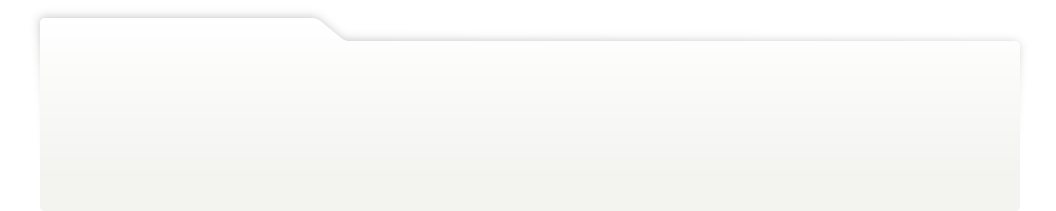
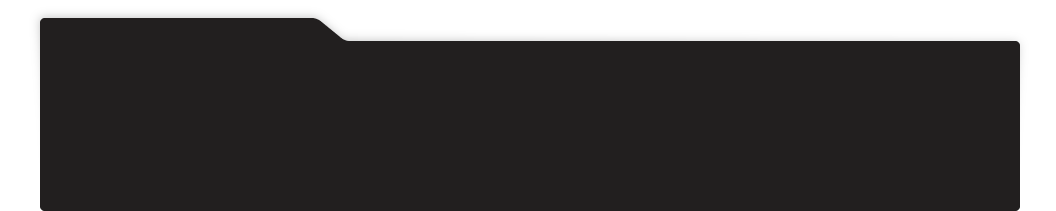
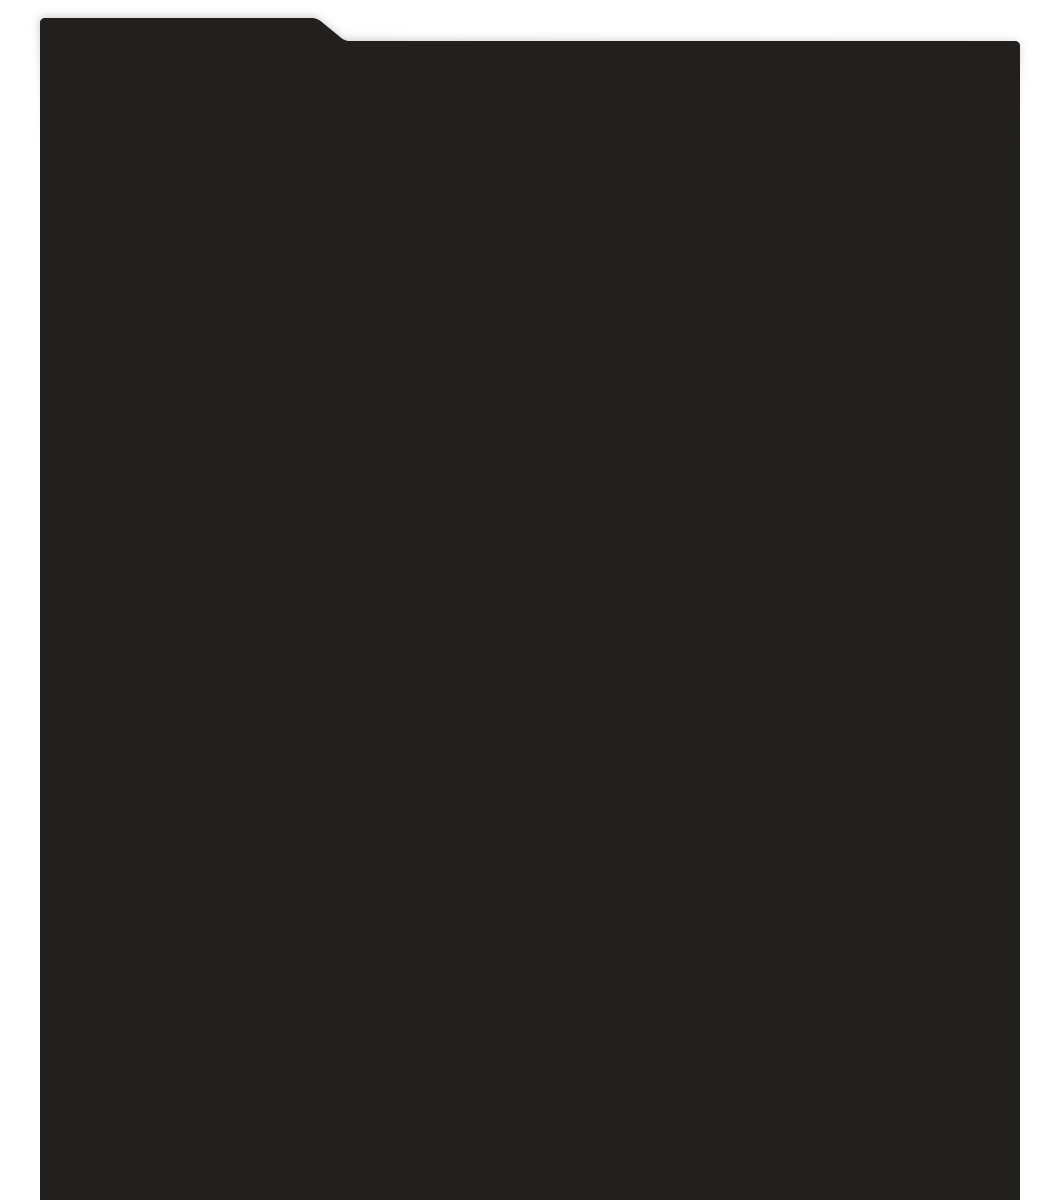
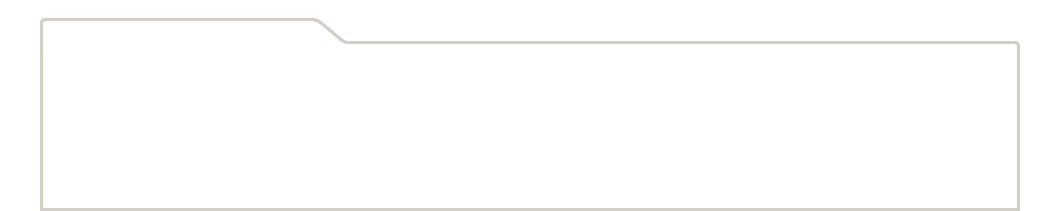
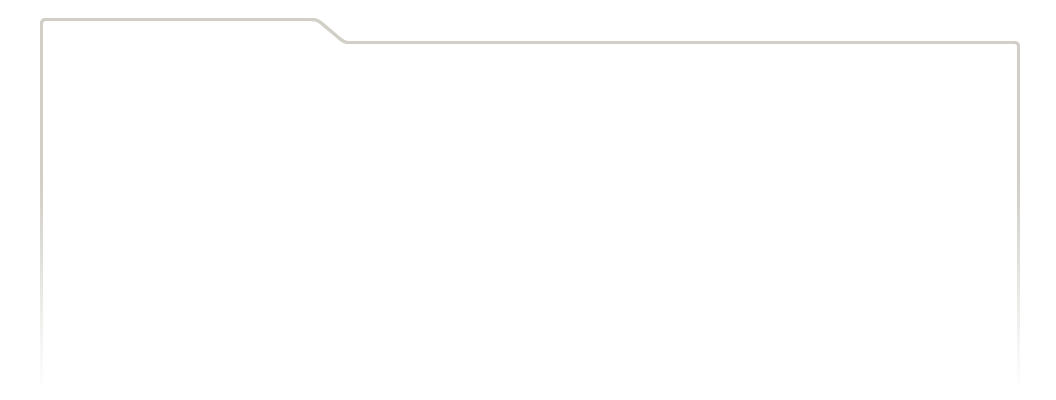
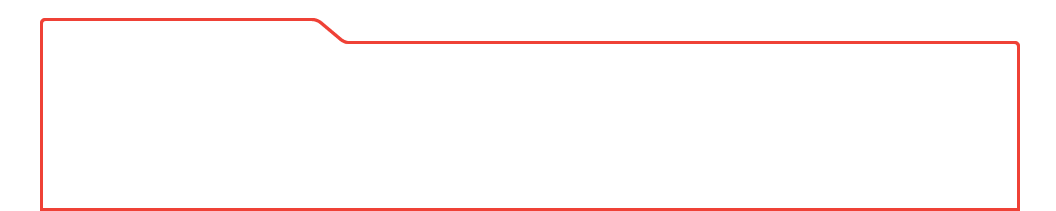
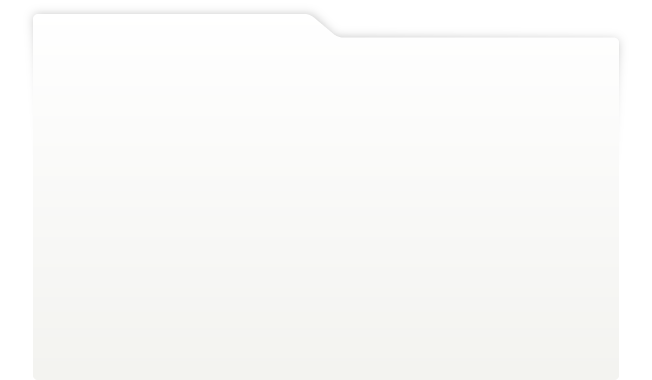
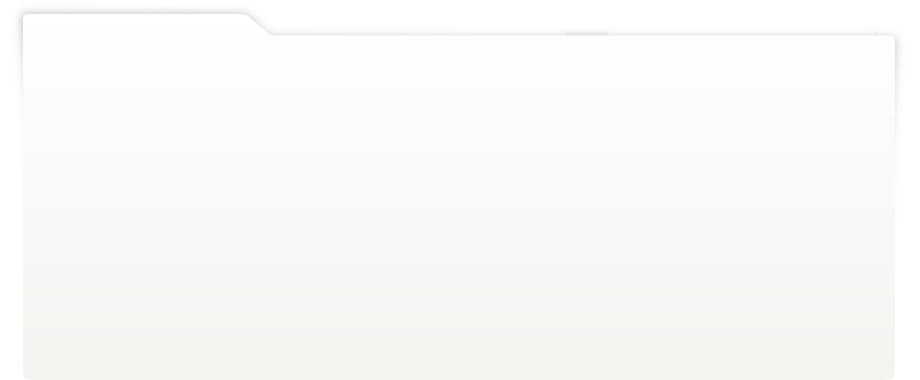
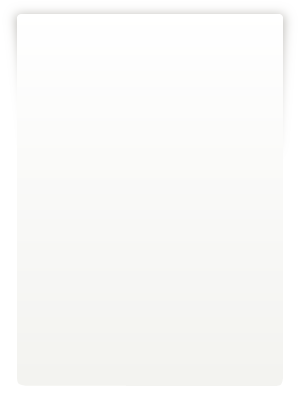
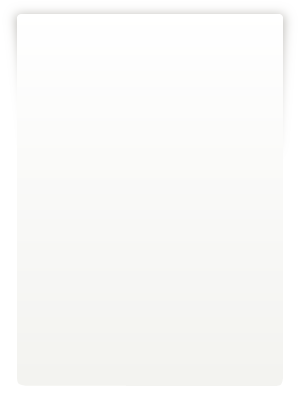
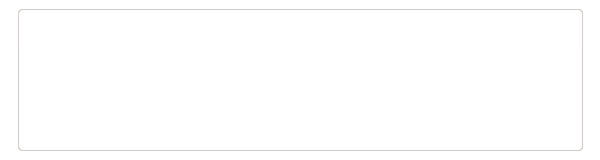
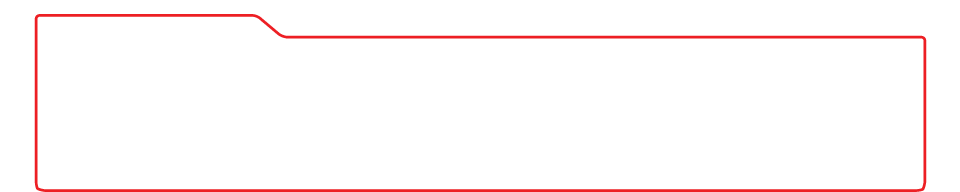
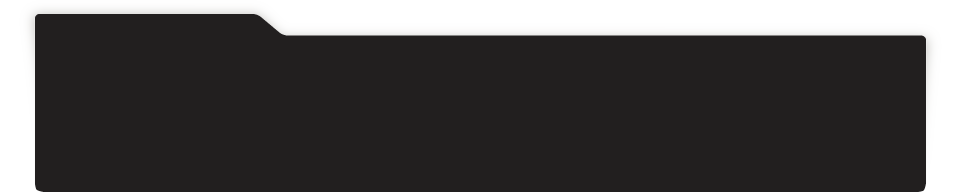
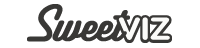
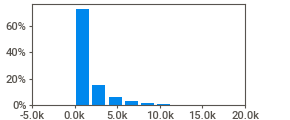
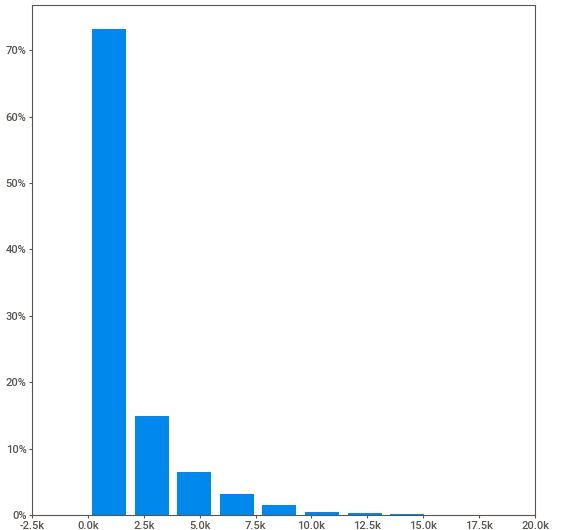
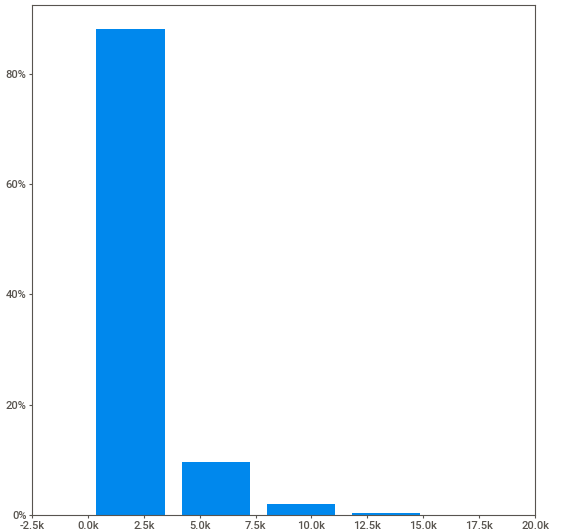
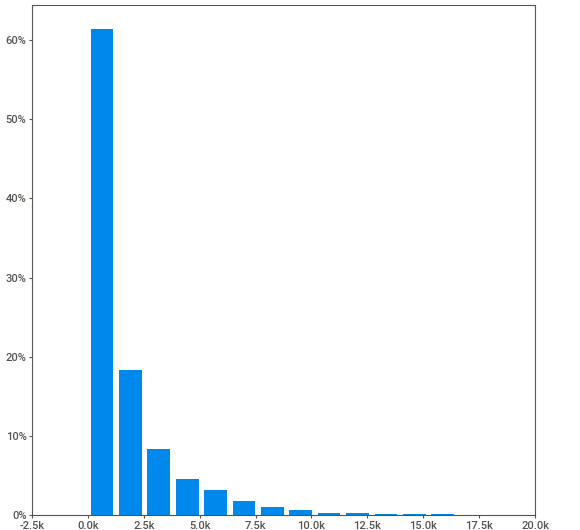
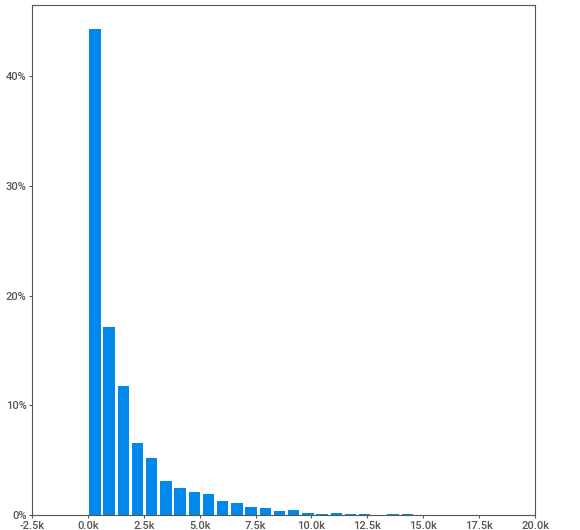
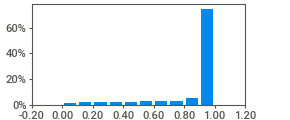
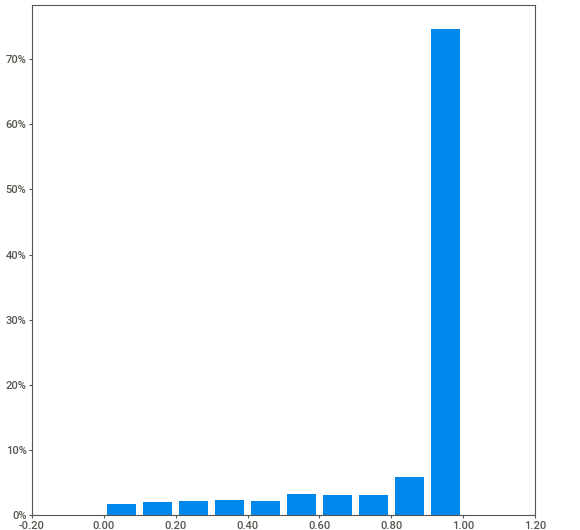
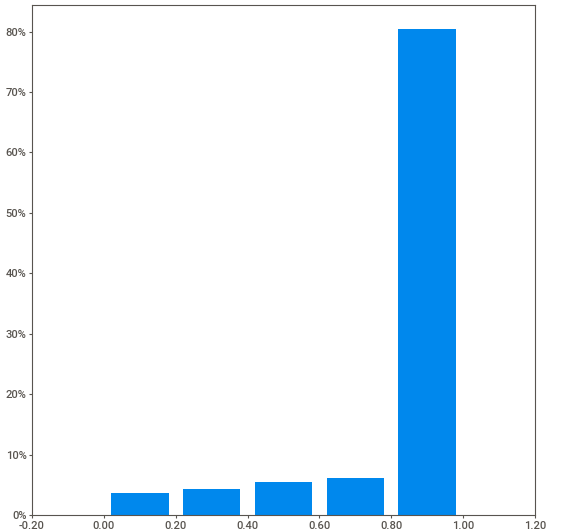
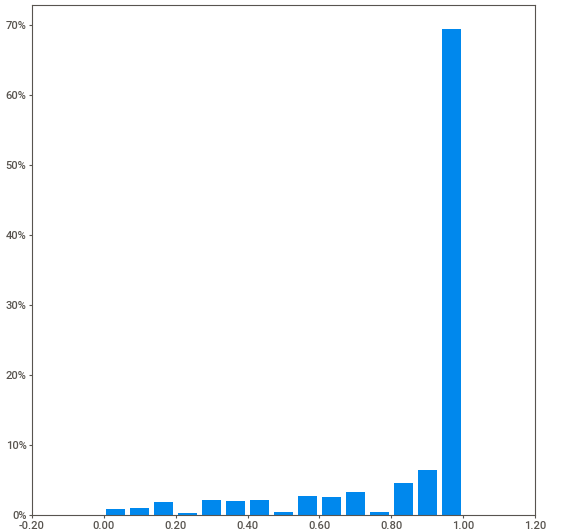
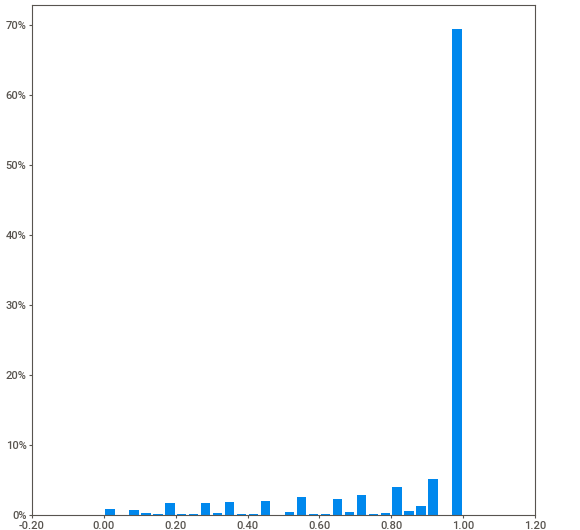
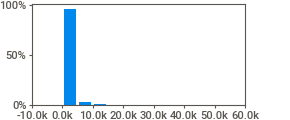
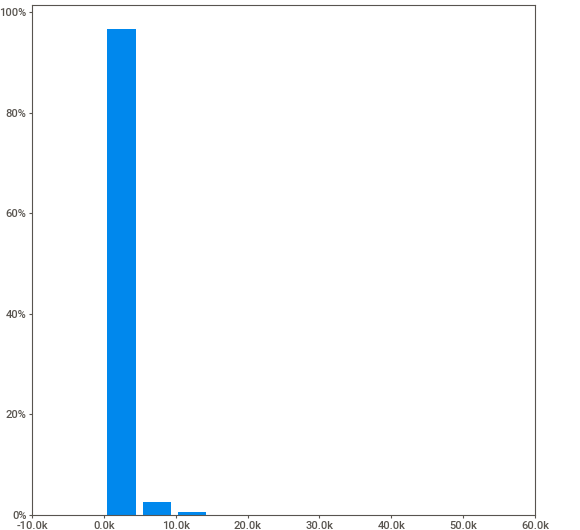
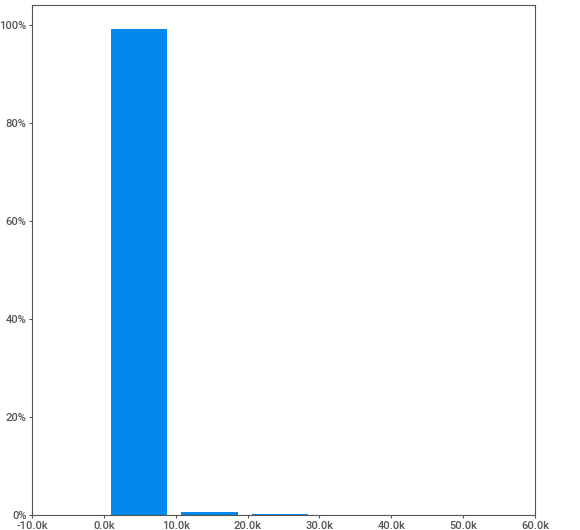
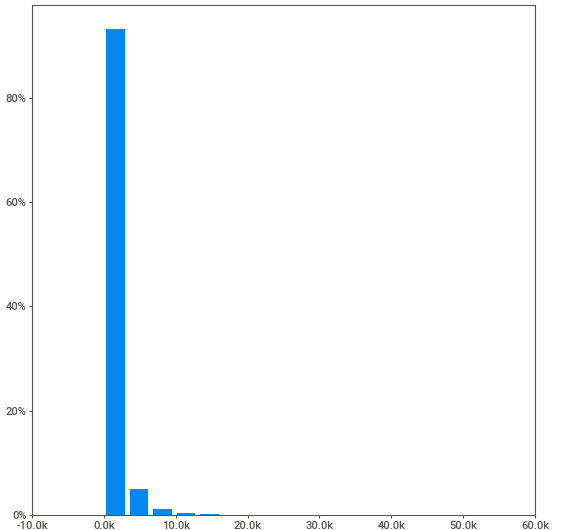
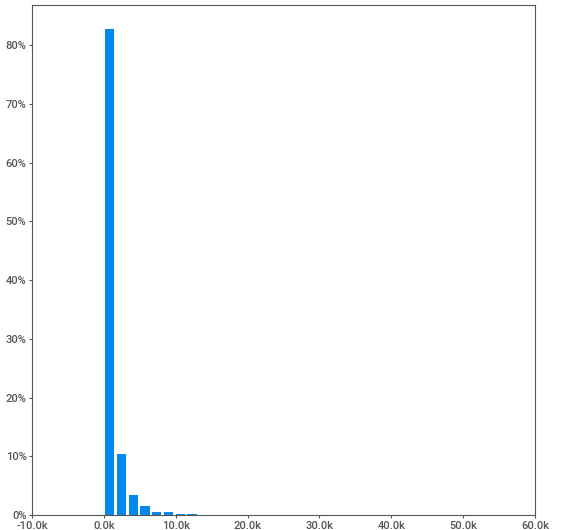
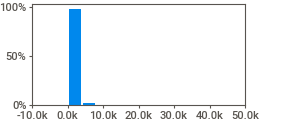
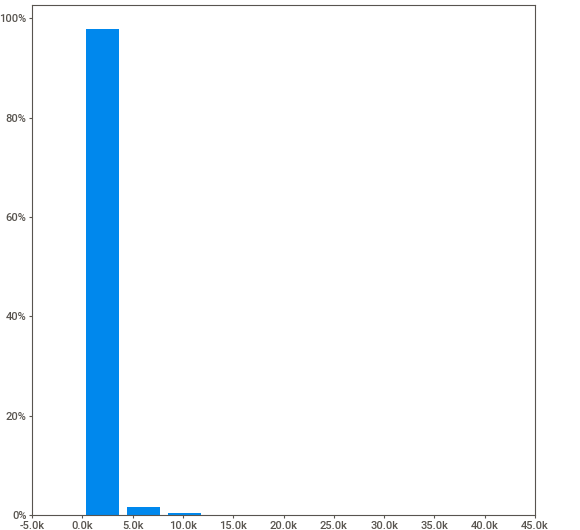
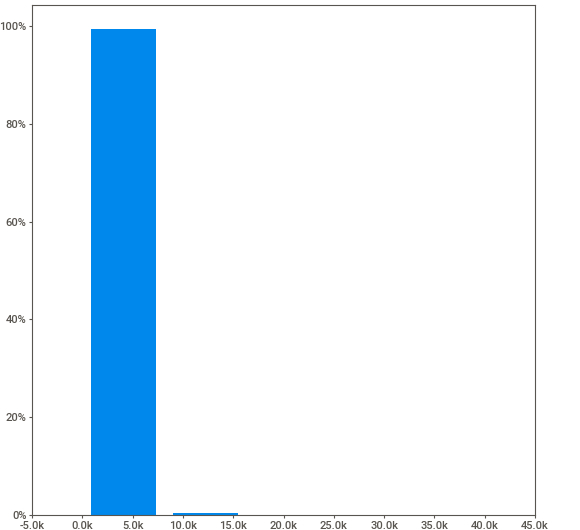
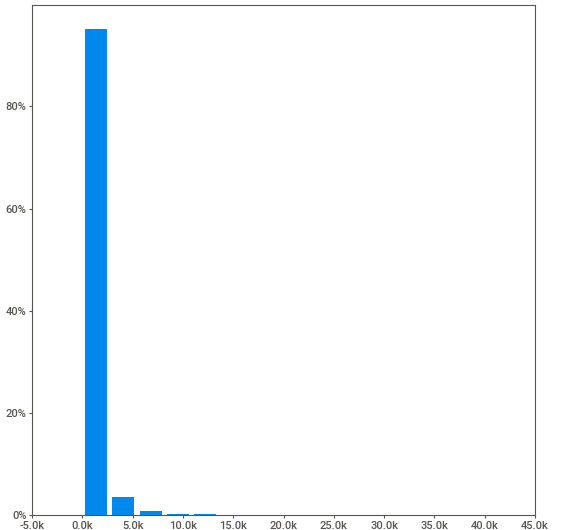
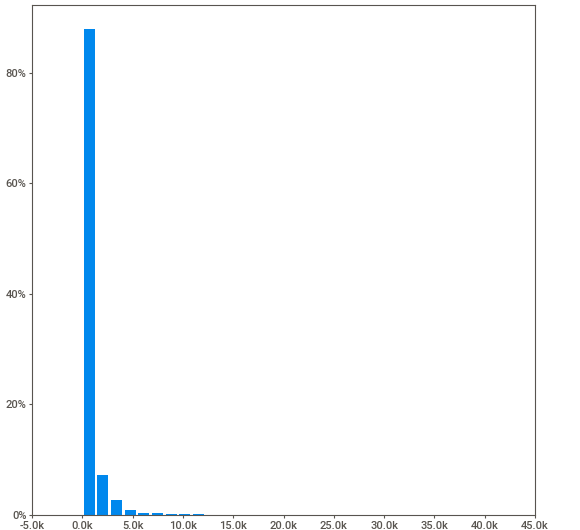
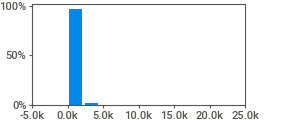
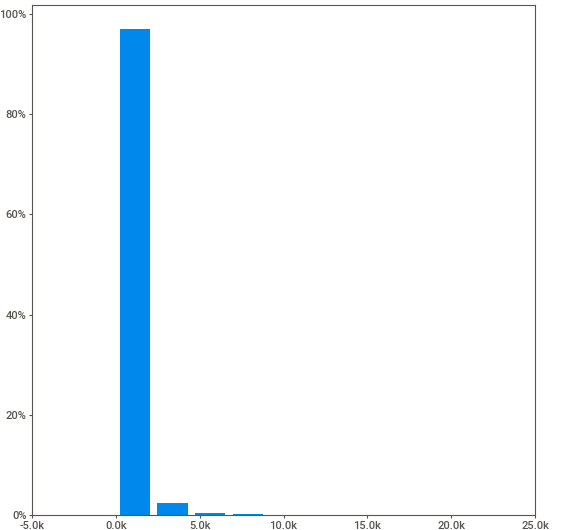
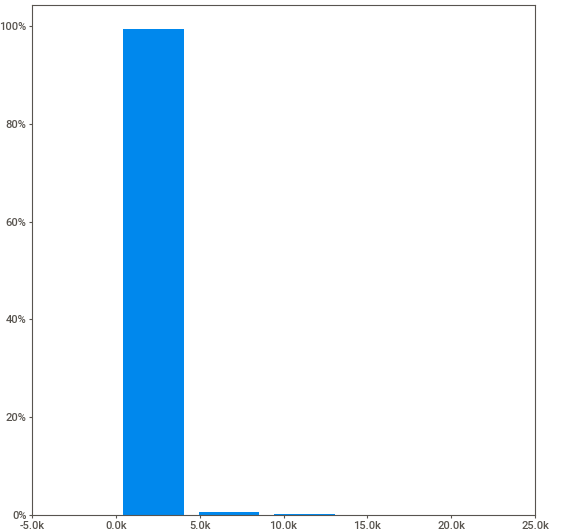
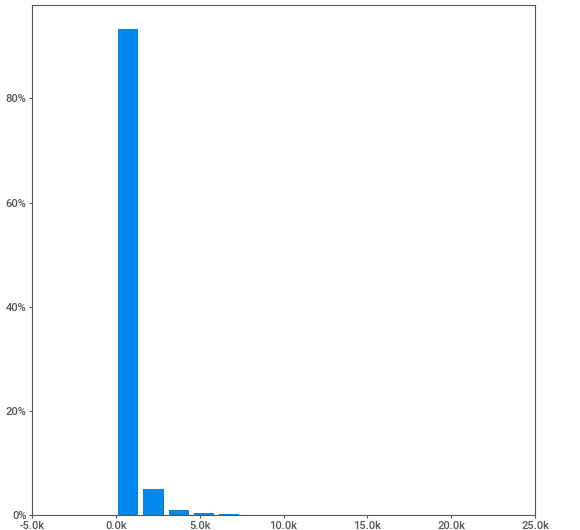
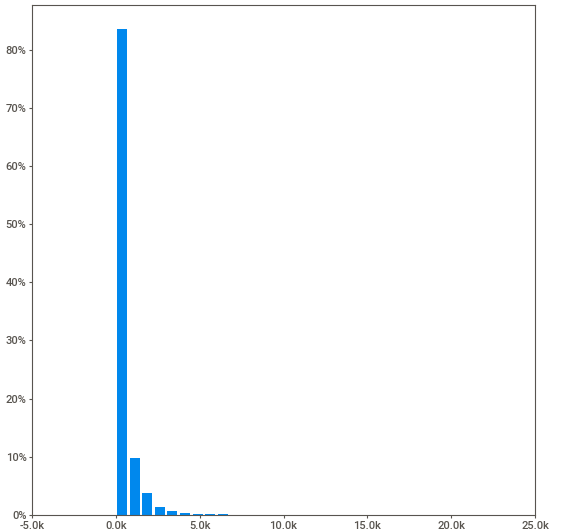
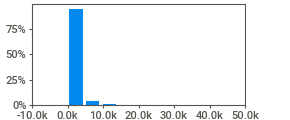
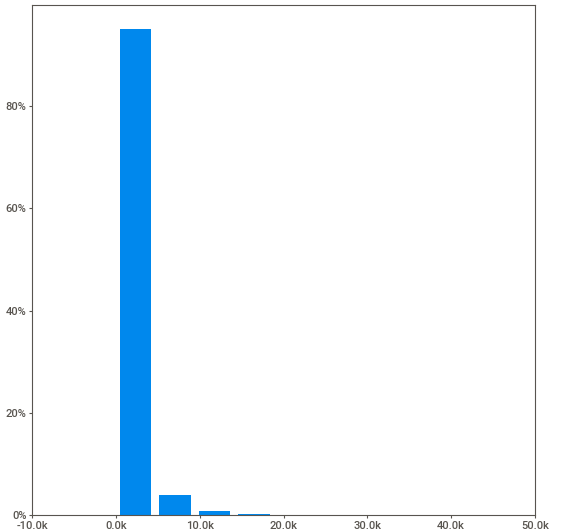
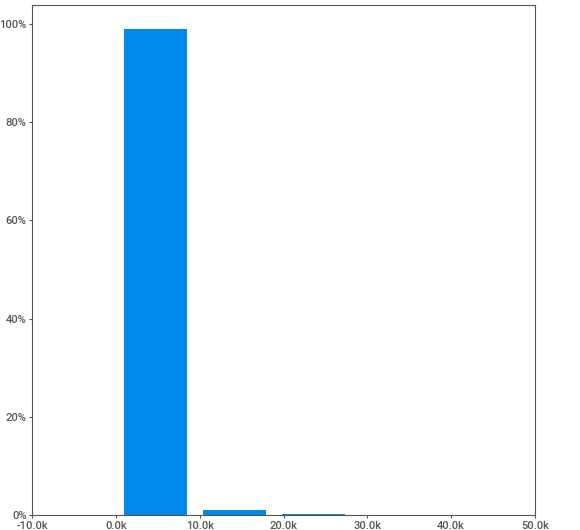
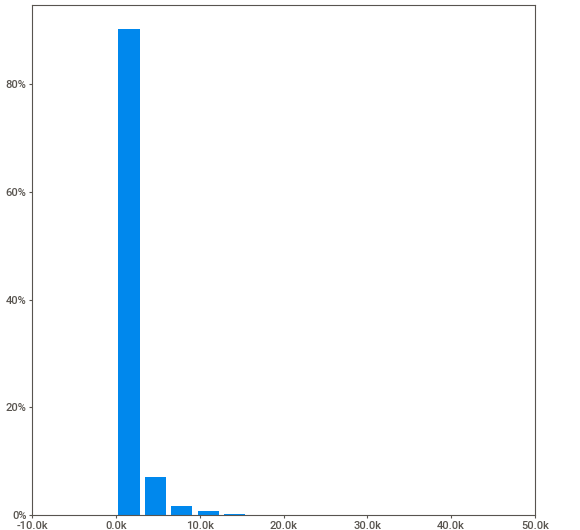
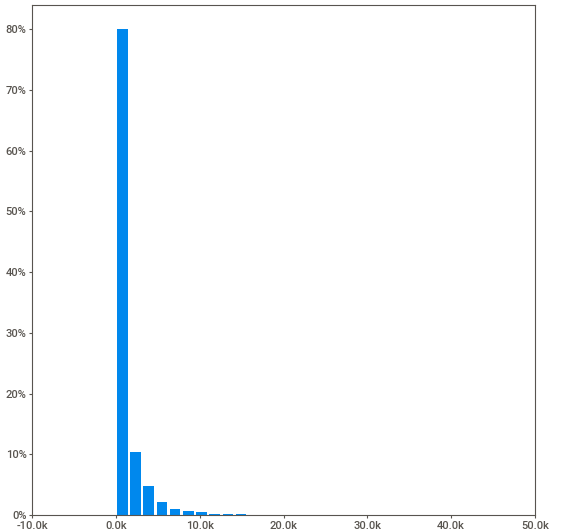
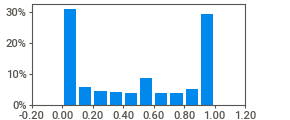
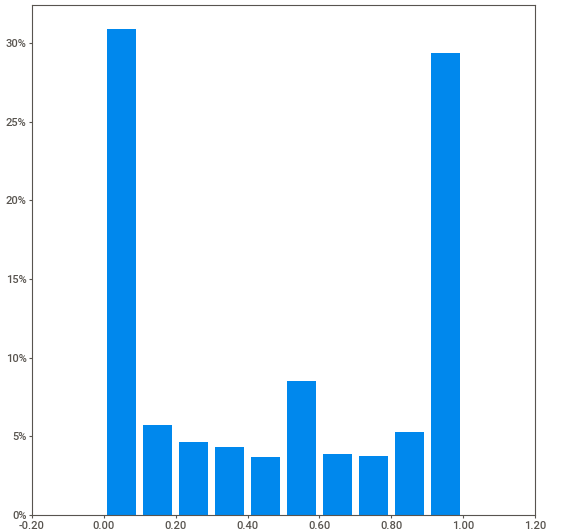
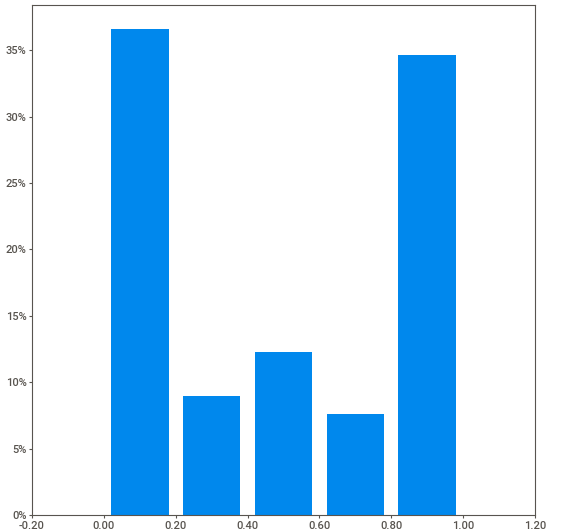
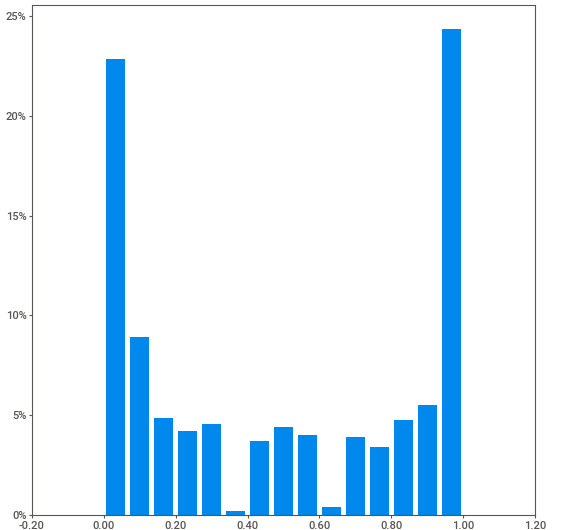
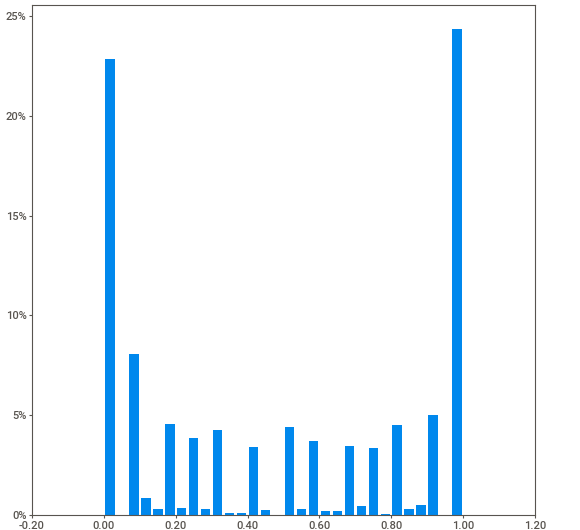
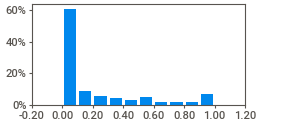
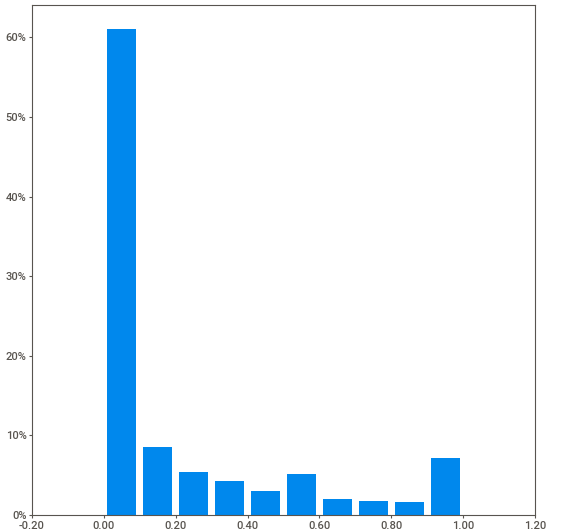
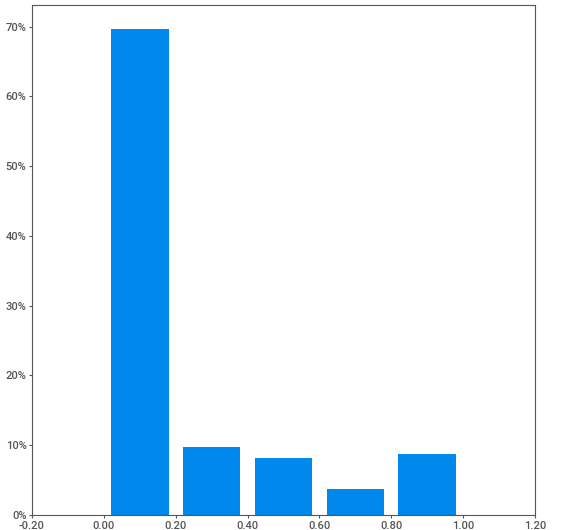
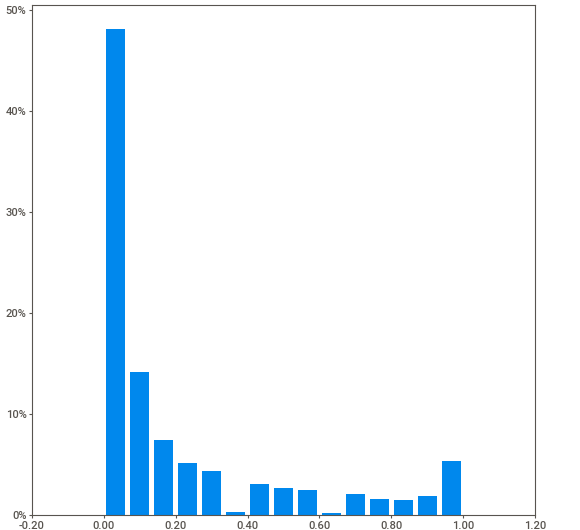
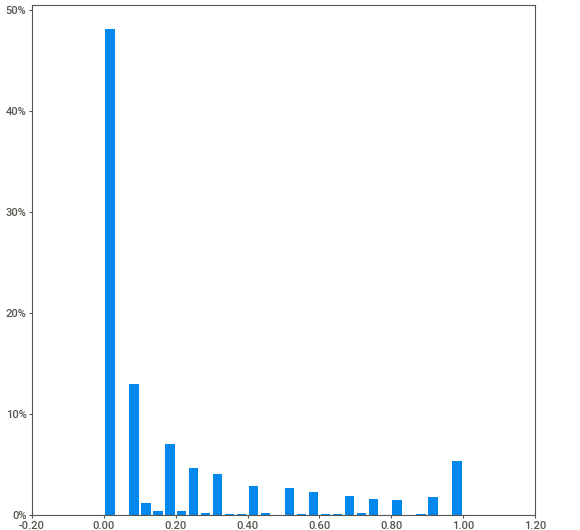
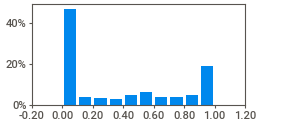
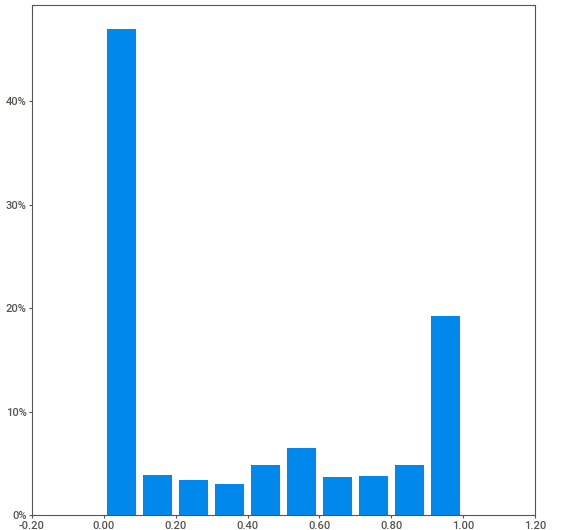
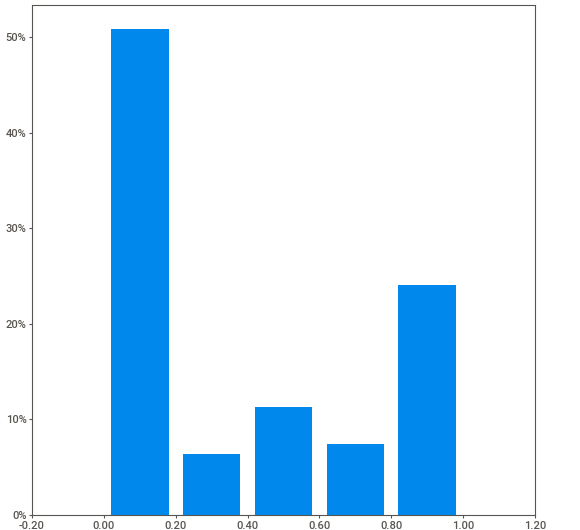
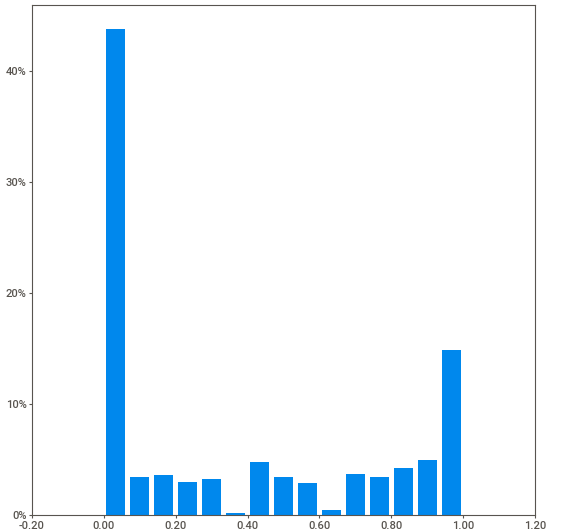
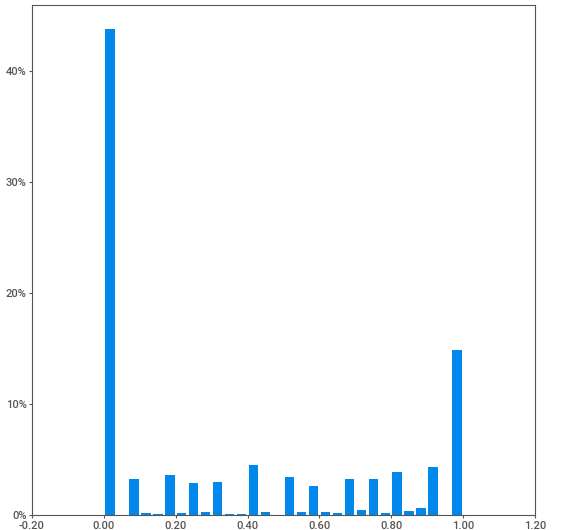
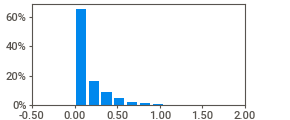
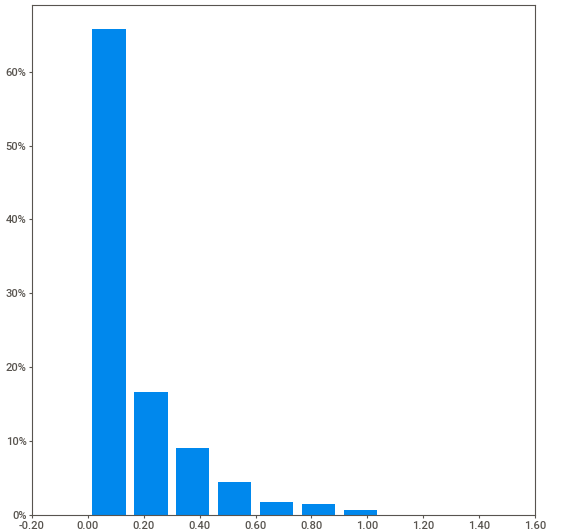
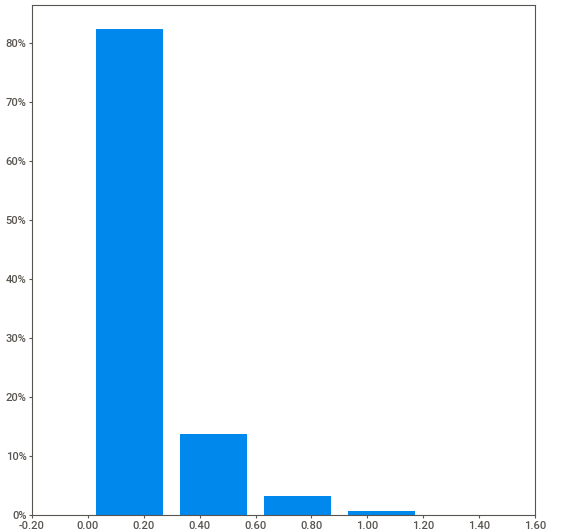
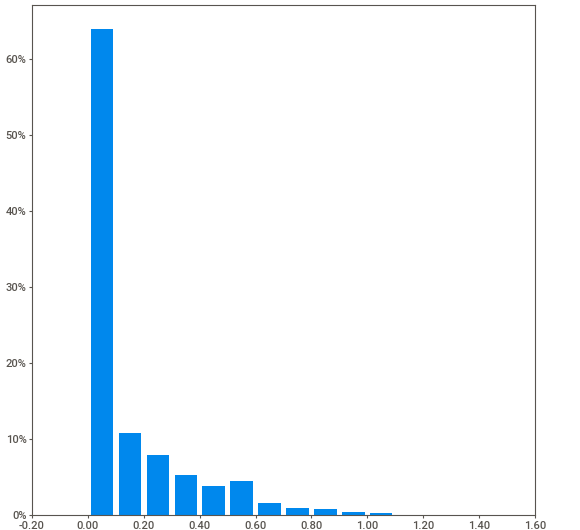
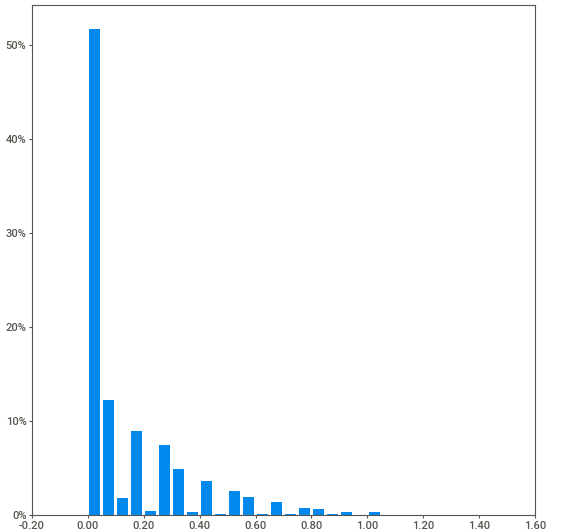
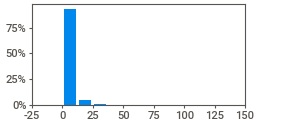
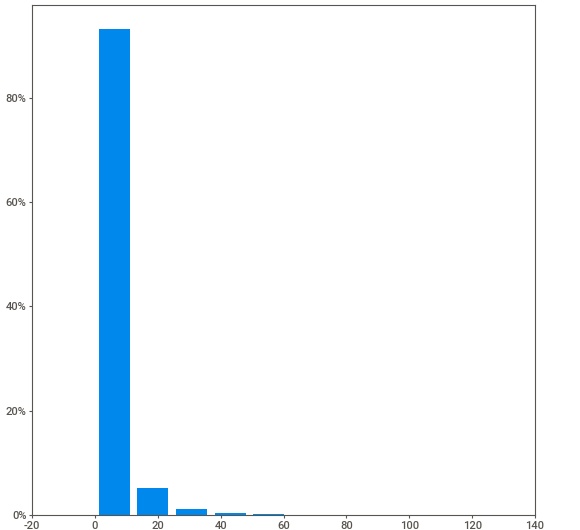
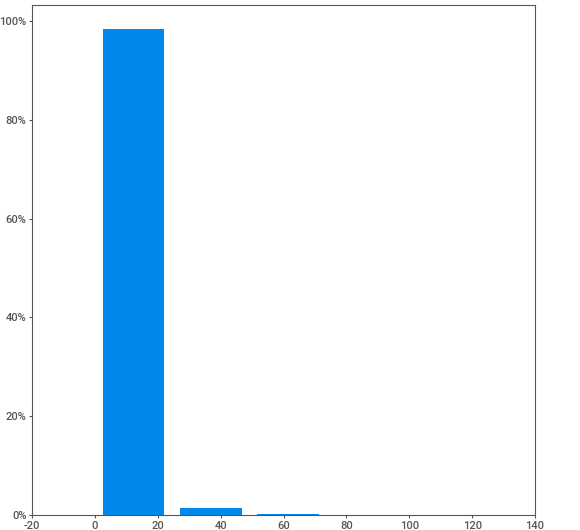
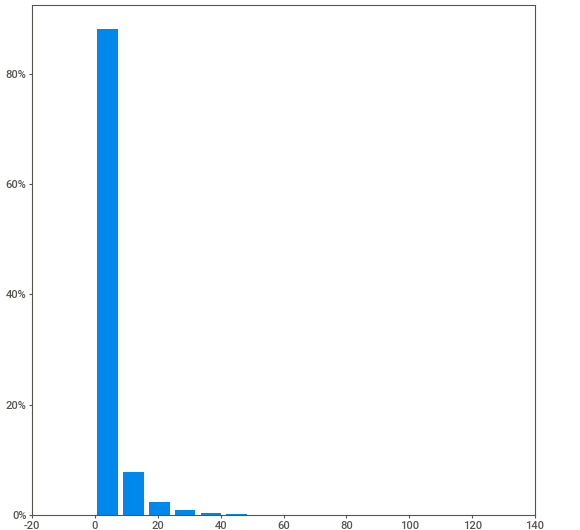
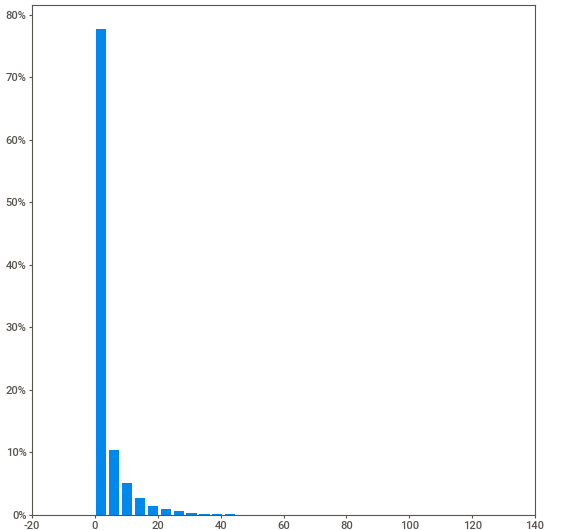
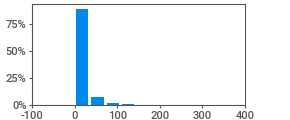
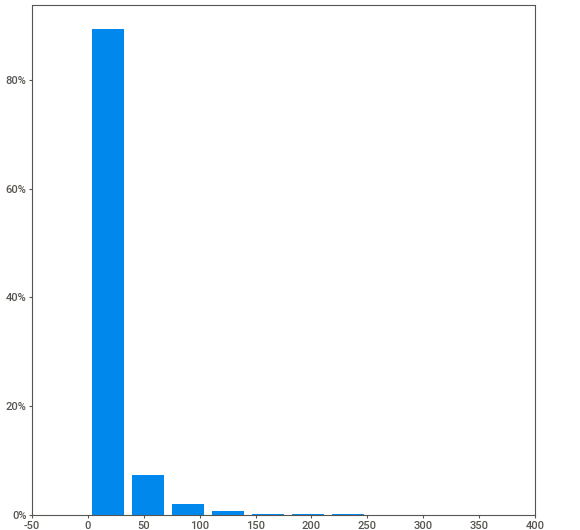
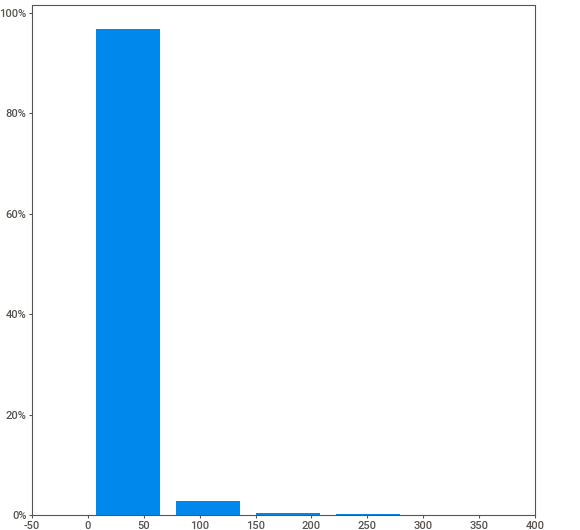
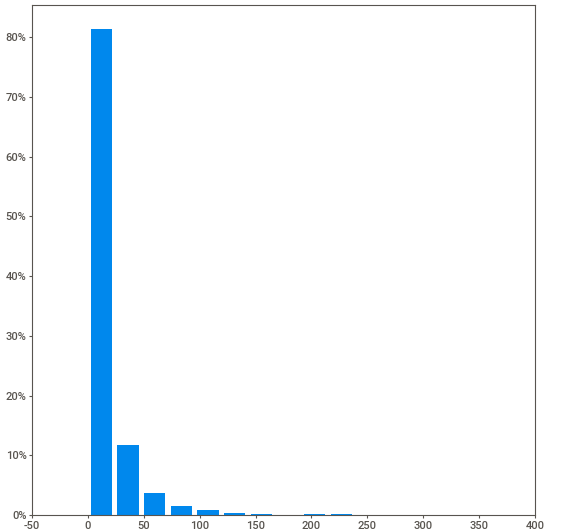
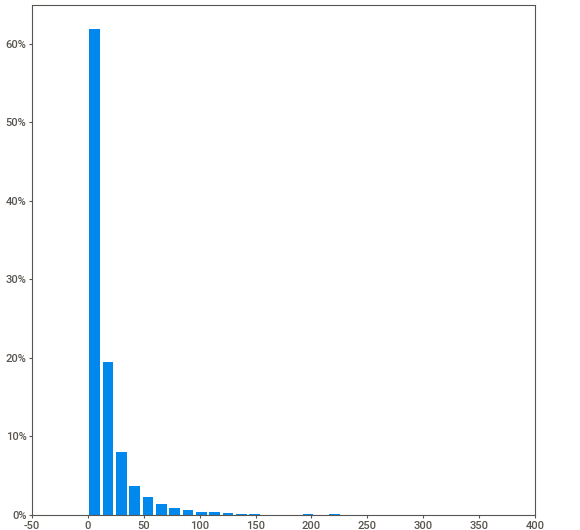
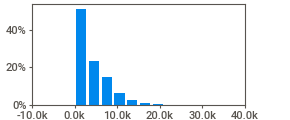
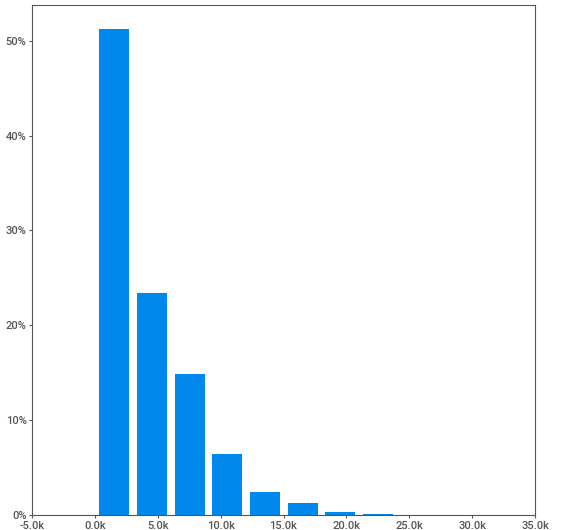
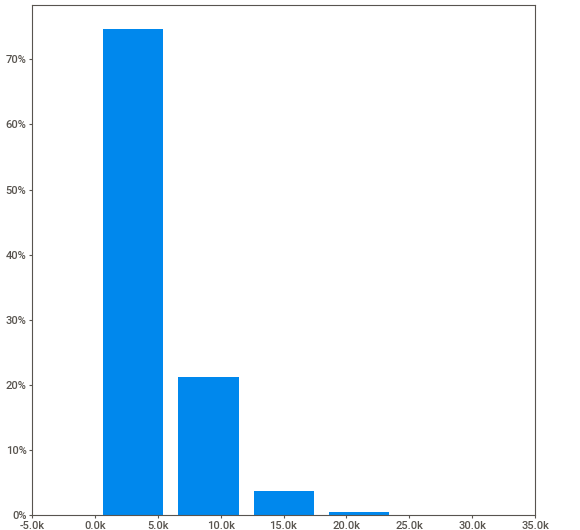
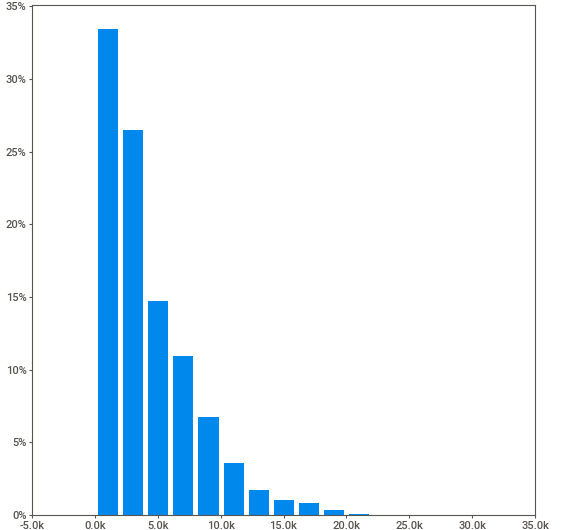
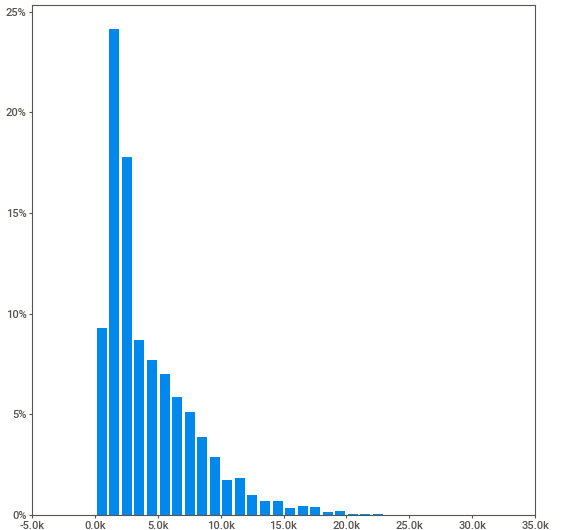
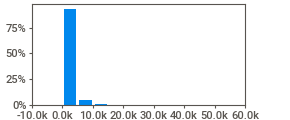
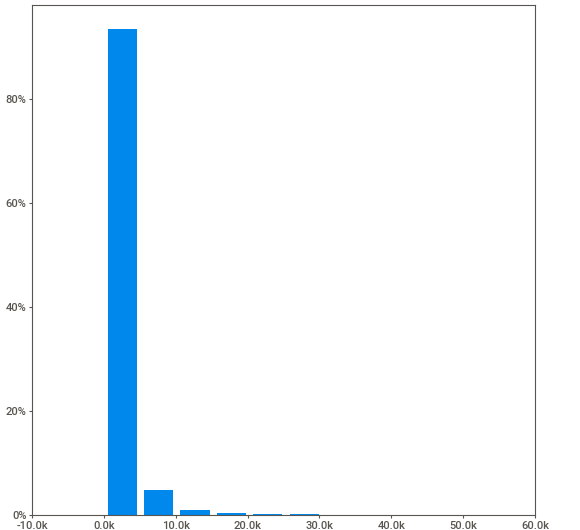
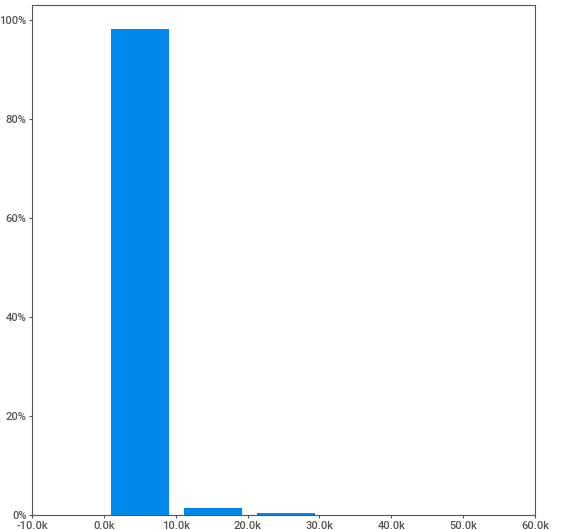
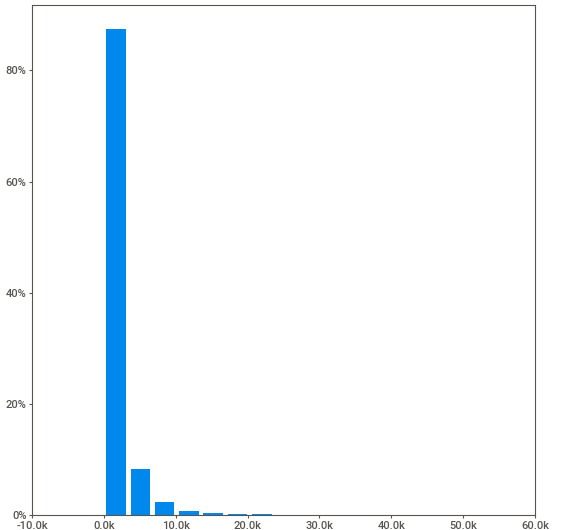
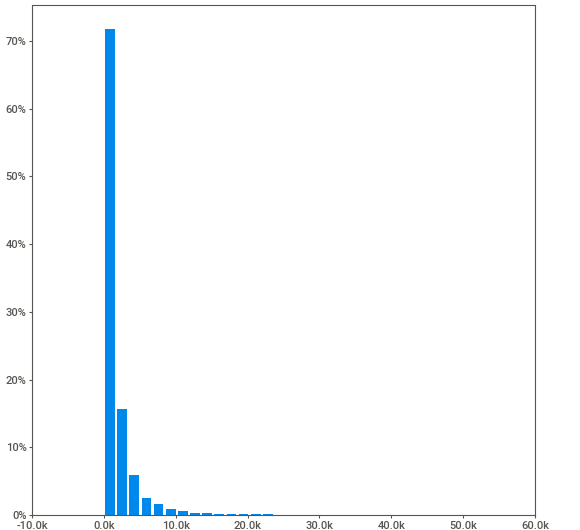
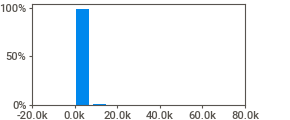
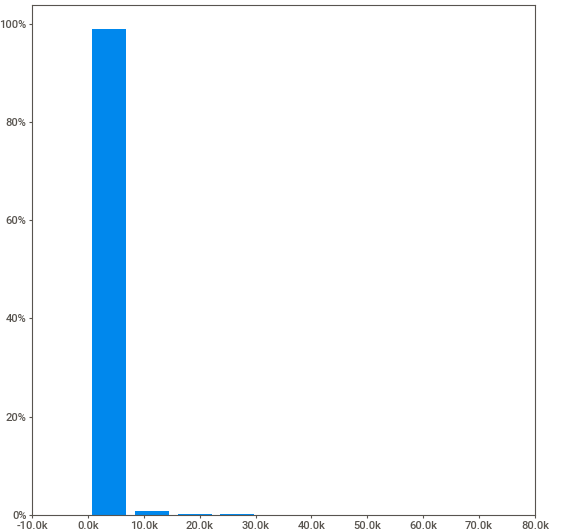
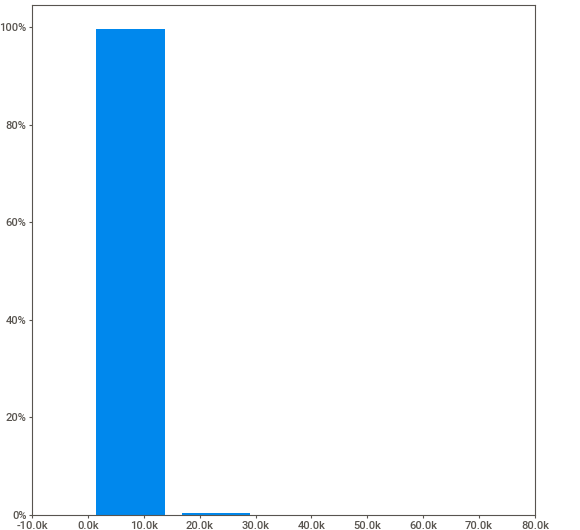
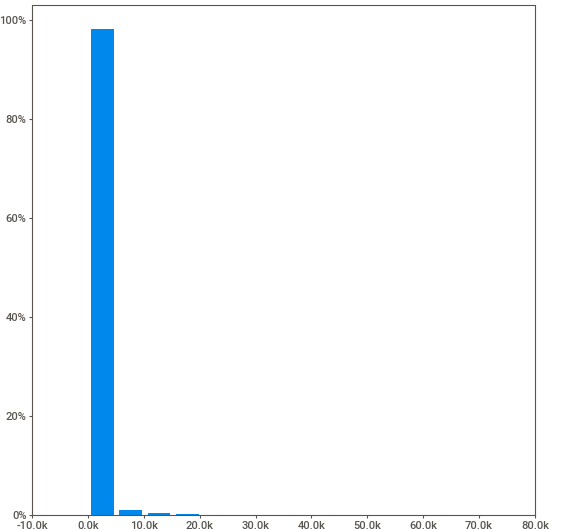
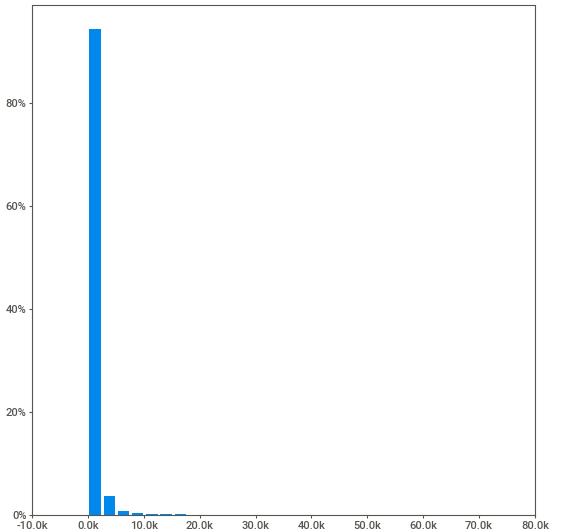
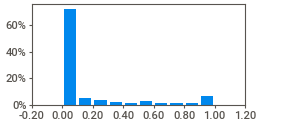
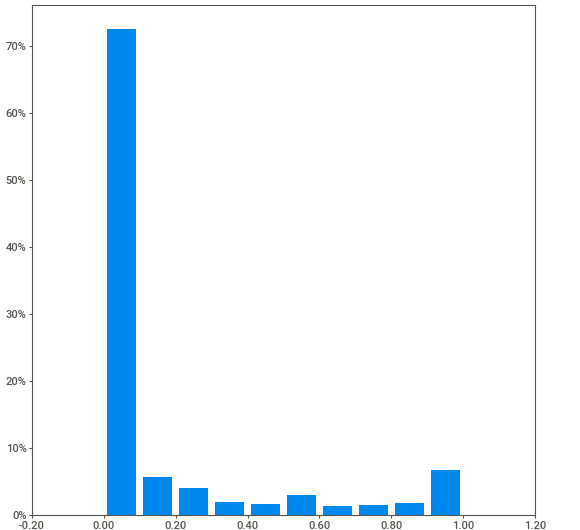
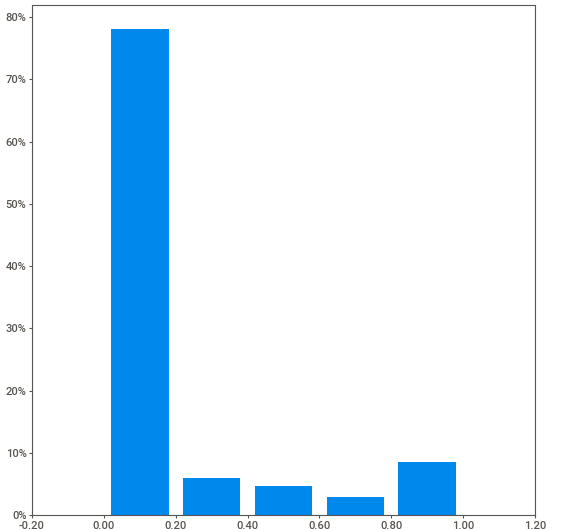
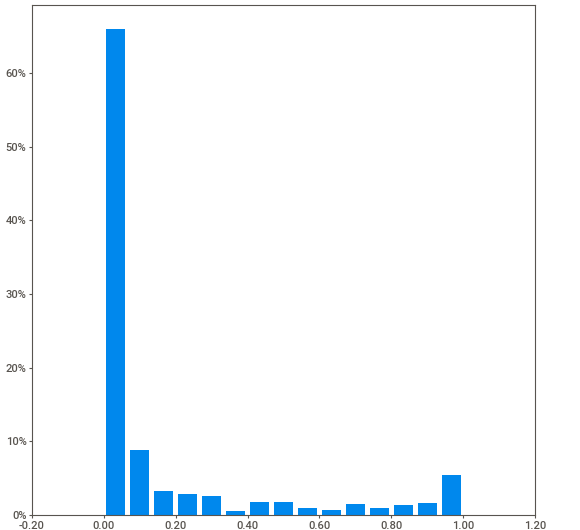
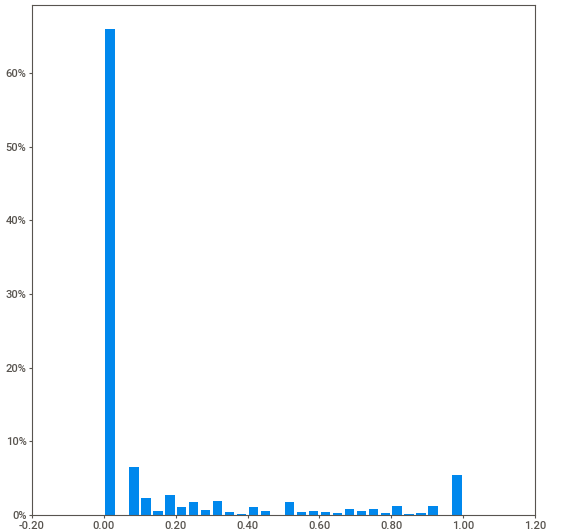
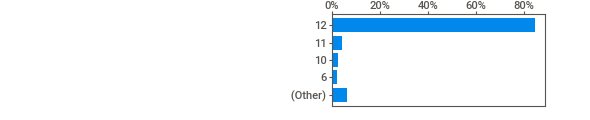
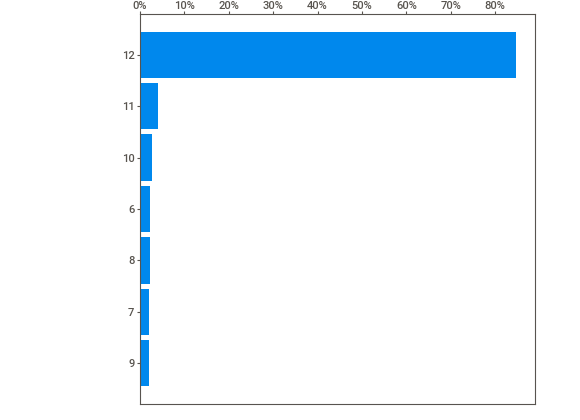
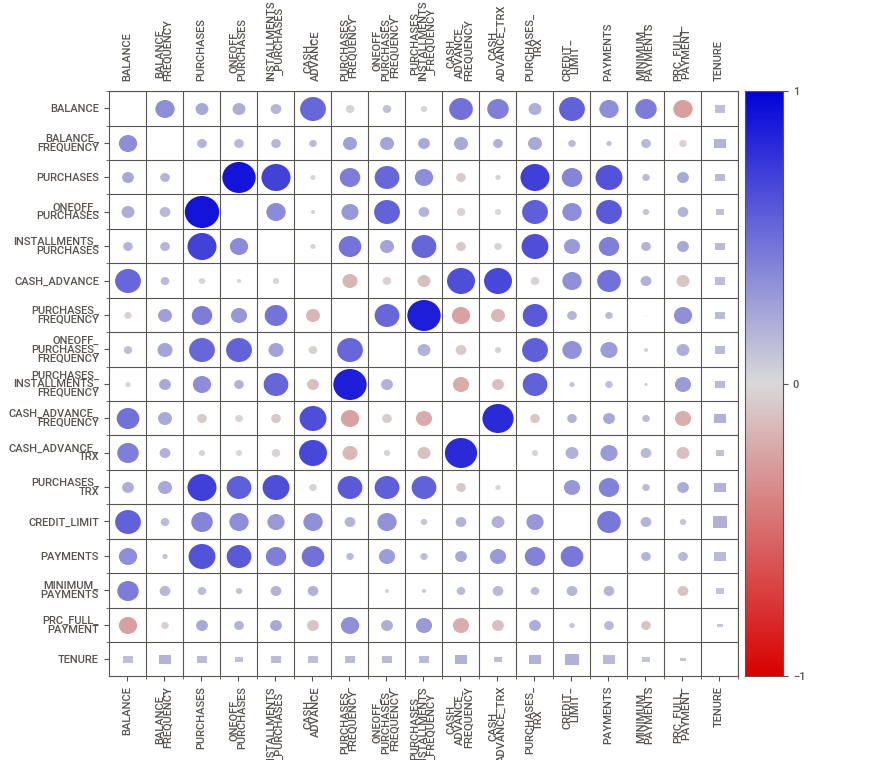
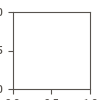

In [11]:
report = sv.analyze(df)
report.show_notebook()

- Except for **PURCHASES_FREQUENCY**, none of the headers have a balanced distribution. Moreover, even **PURCHASES_FREQUENCY** does not have a normal distribution!
- As mentioned in the previous section, there is a significant skewness in some headers. As a result, a more detailed examination is needed to identify outliers. Also, conventional clustering algorithms may not be efficient enough..

It's time to examine the average of the **outliers** found in the dataset. To detect outliers, we used the **IQR (Interquartile Range)** method. ;

In [12]:
outlier_percentage = {}
for feature in df:
    tempData = df.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)

    outlier_count = ((tempData < Lower_range) | (tempData > Upper_range)).sum()
    outlier_perc = round((outlier_count / tempData.shape[0]) * 100, 2)
    outlier_percentage[feature] = outlier_perc

outlier_percentage

{'BALANCE': 7.77,
 'BALANCE_FREQUENCY': 16.68,
 'PURCHASES': 9.03,
 'ONEOFF_PURCHASES': 11.32,
 'INSTALLMENTS_PURCHASES': 9.69,
 'CASH_ADVANCE': 11.51,
 'PURCHASES_FREQUENCY': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 8.74,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'CASH_ADVANCE_FREQUENCY': 5.87,
 'CASH_ADVANCE_TRX': 8.98,
 'PURCHASES_TRX': 8.56,
 'CREDIT_LIMIT': 2.77,
 'PAYMENTS': 9.03,
 'MINIMUM_PAYMENTS': 8.65,
 'PRC_FULL_PAYMENT': 16.47,
 'TENURE': 15.26}

According to these results, in some features; for instance, **BALANCE_FREQUENCY**, **PRC_FULL_PAYMENT**, and **TENURE** the percentage of outliers is quite high. It's necessary to evaluate the effects of these features on the dataset and how to handle these outliers. On the other hand, in some features; there are no outliers in **PURCHASES_FREQUENCY** and **PURCHASES_INSTALLMENTS_FREQUENCY**.

Outliers could have adverse effects on our analyses and modelings, hence, it's important to develop strategies regarding these values. These strategies could be in the form of deletion, transformation, or handling them via another method.

It's not always obligatory to deal with outliers as in some cases it could even be misleading. However, in the subsequent analyses, I created a dataset where actions have been taken on outliers, thus had the opportunity to examine different results.

In [13]:
def preprocess_data(data):
    feature_boundaries = {
        'BALANCE': [0, 500, 1000, 3000, 5000, 10000],
        'PURCHASES': [0, 500, 1000, 3000, 5000, 10000],
        'ONEOFF_PURCHASES': [0, 500, 1000, 3000, 5000, 10000],
        'INSTALLMENTS_PURCHASES': [0, 500, 1000, 3000, 5000, 10000],
        'CASH_ADVANCE': [0, 500, 1000, 3000, 5000, 10000],
        'CREDIT_LIMIT': [0, 500, 1000, 3000, 5000, 10000],
        'PAYMENTS': [0, 500, 1000, 3000, 5000, 10000],
        'MINIMUM_PAYMENTS': [0, 500, 1000, 3000, 5000, 10000]
    }

    frequency_boundaries = {
        'BALANCE_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'PURCHASES_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'ONEOFF_PURCHASES_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'PURCHASES_INSTALLMENTS_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'CASH_ADVANCE_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'PRC_FULL_PAYMENT': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    }

    trx_boundaries = {
        'PURCHASES_TRX': [0, 5, 10, 15, 20, 30, 50, 100],
        'CASH_ADVANCE_TRX': [0, 5, 10, 15, 20, 30, 50, 100]
    }

    def assign_range(column, boundaries):
        new_column = column + '_RANGE'
        data[new_column] = 0
        for idx, boundary in enumerate(boundaries):
            if idx == len(boundaries) - 1:
                data.loc[data[column] > boundary, new_column] = idx + 1
            else:
                data.loc[(data[column] > boundary) & (data[column] <= boundaries[idx + 1]), new_column] = idx + 1

    for column, boundaries in feature_boundaries.items():
        assign_range(column, boundaries)

    for column, boundaries in frequency_boundaries.items():
        assign_range(column, boundaries)

    for column, boundaries in trx_boundaries.items():
        assign_range(column, boundaries)

    columns_to_drop = [
        'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
        'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
        'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'
    ]
    df_wo = df.drop(columns=columns_to_drop)

    return df_wo

In [14]:
df_wo = preprocess_data(df)

This data preprocessing function has been created to categorize certain columns into categorical ranges. Using predefined boundaries for these columns, new features have been derived based on these boundaries. While retaining the numerical values of the relevant features, new columns have been created to determine the categorical ranges corresponding to these values.

**Feature Boundaries:**

Boundaries representing value ranges have been determined for certain columns. For example, for the ‘BALANCE’ column, the boundaries have been defined as: 0, 500, 1000, 3000, 5000, 10000. These boundaries are used to determine in which range the values of a particular feature fall. Implementation of Boundaries:

A helper function named assign_range has been used for each column. This function takes the values of a particular column and converts these values into a categorical column based on the defined boundaries. For example, an observation with a value of 750 in the ‘BALANCE’ column will have a value of 2 in the ‘BALANCE_RANGE’ column, as this value falls between 500 and 1000. Removal of Unnecessary Columns:

The original numerical columns have become redundant once the columns are converted into categorical ranges. Therefore, these columns have been removed from the dataset. In conclusion, this function is used to convert certain columns into categorical ranges, and it removes the original numerical columns from the dataset following this conversion.

In [15]:
df_wo.to_csv('NEW_DATA.csv', index=False)

In [16]:
df = pd.read_csv('/content/NEW_DATA.csv')
df.head(10)

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0
5,12,3,3,0,3,0,3,3,3,10,7,0,6,0,0,2,0
6,12,2,5,5,2,0,6,5,1,10,10,10,10,0,10,7,0
7,12,3,1,0,1,0,3,2,2,10,10,0,10,0,0,3,0
8,12,3,2,2,1,0,5,2,1,10,4,1,3,0,0,1,0
9,12,1,3,3,0,0,6,3,1,6,2,2,0,0,0,1,0


**Data scaling** is often used to ensure machine learning algorithms operate more effectively. Specifically, many algorithms can produce misleading results due to different scales among features. Therefore, it's important to bring all features to a similar scale.



The scaling method we used is **StandardScaler**. StandardScaler scales each feature to have a mean of 0 and a standard deviation of 1. This is also known as z-score normalization.


In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Hopkins Statistic

Before starting the clustering analysis, it is important to check whether the dataset is suitable for clustering. For this purpose, the Hopkins Statistic is used to check whether the dataset is randomly distributed.

The Hopkins Statistic is a test that measures how suitable a dataset is for clustering. A value close to 0.5 indicates that the data has a random distribution, and therefore is not suitable for clustering. On the other hand, if the value is greater than 0.7, the dataset is likely suitable for clustering.

In [18]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)


    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if np.isnan(H):

        print(ujd, wjd)
        H = 0

    return H

In [19]:
hopkins_score = hopkins(df_scaled)
print(hopkins_score)

0.8545333058122018


# 5. K-Means Clustering

Implementing K-Means clustering on the pre-processed data. In this application we try to optimize the Expectation-Maximization (EM) step to create clusters with optimum time complexity. We then compare this to scikit-learn's KMeans to verify if the clustering meets the standards

K-Means is a clustering algorithm used to divide the data into ‘k’ number of clusters. The algorithm operates by randomly initializing each cluster center, and then iteratively updating these centers to be the average of the data points in the clusters. This process continues until a defined criterion (e.g., a situation where the centers do not move) is met. The elbow method and Silhouette score were used as supportive to the K-Means process;

Elbow Method One of the toughest decisions for the K-means algorithm is determining how many clusters the data should be divided into. The elbow method is a common technique used for this decision. This method involves calculating the total within-cluster sum of squares (WCSS) for different k values. As the value of k increases, WCSS decreases. However, after a certain k value, this reduction amount becomes insignificant. This point called the "elbow" helps us to determine the optimal k value.

Silhouette Score The Silhouette score measures how well the clusters are defined. This score takes values between -1 and 1. A value close to 1 indicates that the points are similar within their clusters and different from other clusters, while a value close to -1 indicates that these points are clustered incorrectly. A value of 0 indicates uncertainty about how far apart the clusters are from each other.

In [20]:
## KMEANS
def K_Means(data,k,max_iter,patience):
  ## Initialize centers
  centers = data[np.random.choice(data.shape[0],k,replace=False)]
  closest = np.zeros((data.shape[0]))
  count=0
  new_sum = 0
  for i in tqdm(range(max_iter)):
    old_sum = new_sum
    new_sum = np.zeros(k)
    dist_mat = euclidean_distances(data,centers) ## dist_mat: (n,k)

    ## Getting which cluster each point is closest to
    closest = np.argmin(dist_mat,axis=1)

    ## Getting the mean of each cluster
    for j in range(k):
      new_sum[j]+= dist_mat[np.where(closest==j)][:,j].sum(axis=0)
      centers[j,:] = data[closest==j].mean(axis=0)
    new_sum = np.sum(new_sum)
    if new_sum == old_sum:
      count+=1

    if count>patience:
      break

  return closest,centers

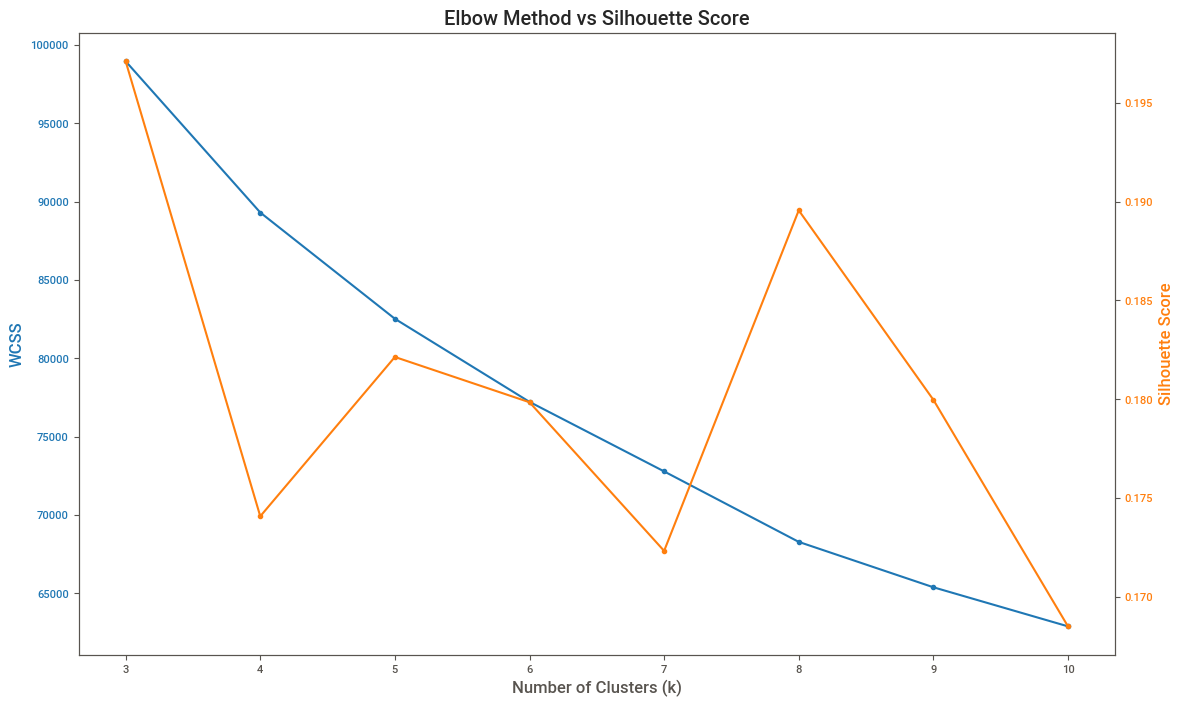

In [21]:
k_values = range(3, 11)
wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(0)

fig, ax1 = plt.subplots(figsize=(12, 7))


ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(k_values, wcss, 'o-', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:orange')
ax2.plot(k_values, silhouette_scores, 'o-', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Elbow Method vs Silhouette Score')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

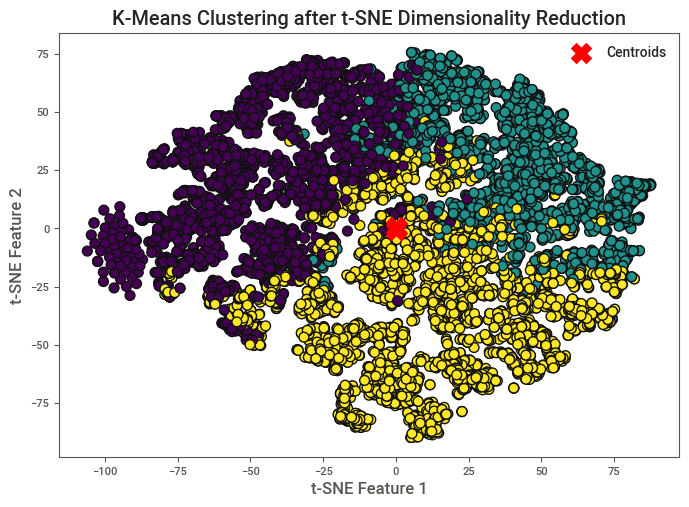

In [23]:
# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)

# Get cluster labels
labels = kmeans.labels_

# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering after t-SNE Dimensionality Reduction')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

# 6. Gaussian Mixture Models (GMM)

Gaussian Mixture Model (GMM) is another clustering algorithm that extends beyond K-Means by incorporating probabilistic models. Unlike K-Means, GMM assumes that the data is generated from a mixture of several Gaussian distributions, each representing a cluster. GMM provides a more flexible framework where data points are not strictly assigned to a single cluster but instead have probabilities of belonging to each cluster.

The Expectation-Maximization (EM) algorithm is employed in the context of GMM to iteratively update parameters. The EM algorithm consists of an E-step, where probabilities (responsibilities) of data points belonging to each cluster are computed, and an M-step, where the parameters of the Gaussian distributions are updated based on these probabilities.

In the E-step, the algorithm calculates the probability of each data point belonging to each cluster, considering the Gaussian distributions with their means, covariances, and weights. In the M-step, the algorithm updates the parameters, including the means, covariances, and weights of the Gaussian distributions, based on the computed probabilities.

Similar to the K-Means approach, the optimal number of clusters in GMM can be determined using techniques such as the elbow method, Silhouette score, or other model selection criteria.

In [24]:
def predict_proba(X,mu,sigma,phi,k):
    n, m = X.shape
    # Calculate Gaussian Distributions and Likelihoods for all the classes
    likelihood = np.zeros((n,k))
    for i in range(k):
        distribution = multivariate_normal(mean = mu[i], cov = sigma[i])
        likelihood[:,i] = distribution.pdf(X)

    # Probability of Each Class
    numerator = likelihood * phi
    # Sum of all Probabilities
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    return weights

def e_step(X,mu,sigma,phi,k):
    weights = predict_proba(X,mu,sigma,phi,k)
    phi = weights.mean(axis=0)

    return weights,phi

def m_step(X,weights):
    for i in range(k):
        weight = weights[:, [i]]
        total_weight = weight.sum()

        mu[i] = (X * weight).sum(axis=0) / total_weight
        sigma[i] = np.cov(X.T, aweights=(weight/total_weight).flatten(), bias=True)

        return mu,sigma

# Number of clusters required
k = 2
max_iter = 100
n, m = df_scaled.shape
phi = np.full(shape = k, fill_value = 1/k)
random_row = np.random.randint(low = 0, high = n, size = k)
mu = [df_scaled[row_index,:] for row_index in random_row]
sigma = [np.cov(df_scaled.T) for _ in range(k)]

# Train
for iteration in range(max_iter):
    weights,phi = e_step(df_scaled,mu,sigma,phi,k)
    mu,sigma = m_step(df_scaled,weights)

# Assign clusters for df_scaled
cluster_assignments = np.argmax(weights, axis=1)
print("Cluster Assignments:", cluster_assignments)

Cluster Assignments: [0 0 0 ... 0 0 0]


In [25]:
len(cluster_assignments)

8950

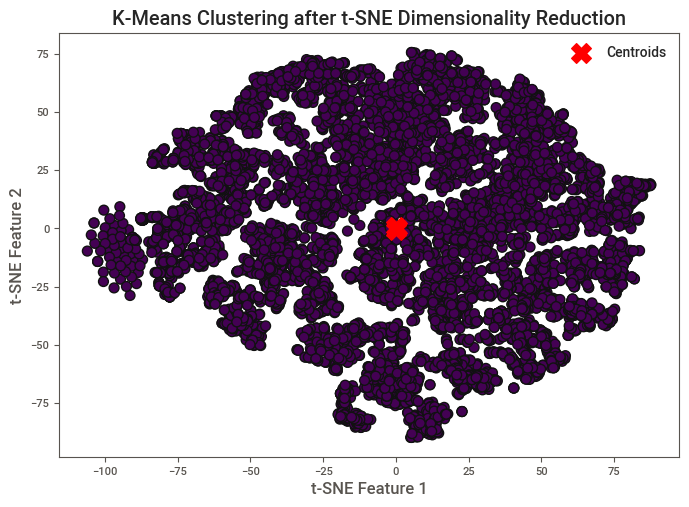

In [26]:
 # Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)

# Get cluster labels
labels = cluster_assignments

# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering after t-SNE Dimensionality Reduction')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

# 7. DBSCAN

We have implemented Density Based Spatial Clustering of Algorithms with Noise (DBSCAN) Algorithm by using a queue and taking inspirations from Breadth First Search(BFS). We are first creating neighbour hoods by finding all the points that are within epsilon distance of each other and then we run DBSCAN by using BFS and checking their neighbors and assigning them the cluster labels while visiting them.

In [27]:
url = 'CC GENERAL.csv'
df = pd.read_csv(url)
df = df.drop(columns=['CUST_ID'])

df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

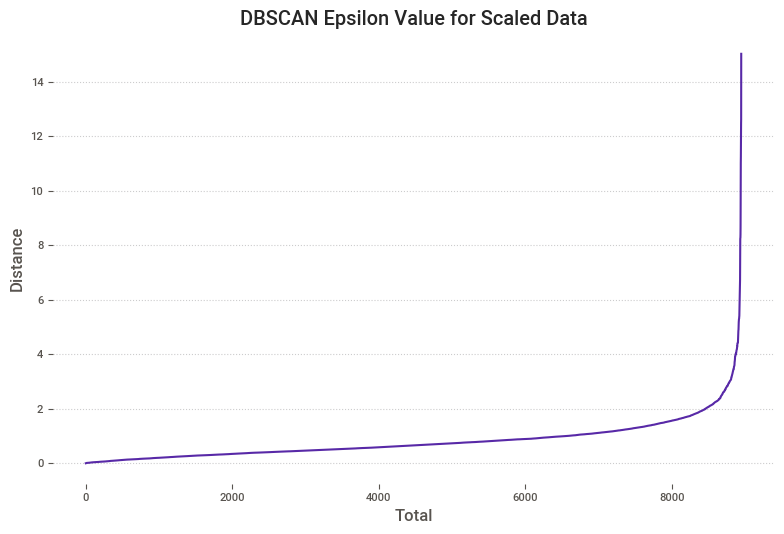

In [28]:
X = df_scaled

def epsilon(X):

    neighbors = NearestNeighbors(n_neighbors=2)
    nbrs = neighbors.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)

    distances_1 = distances[:, 1]
    plt.plot(distances_1, color='#5829A7')
    plt.xlabel('Total')
    plt.ylabel('Distance')

    for spine in plt.gca().spines.values():
        spine.set_color('None')

    plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    plt.grid(axis='x', alpha=0)

    plt.title('DBSCAN Epsilon Value for Scaled Data')
    plt.tight_layout()
    plt.show();

epsilon(X);

In [29]:
def dbscan(originalDF , epsilon = 7.5 , minPoints = 3):

    df=originalDF.copy()
    print("Starting to calc euclidean")
    euclideanMatrix = euclidean_distances(df)
    print("Finished calc euclidean")

    #Neighborhood creation by finding all the points that are less than epsilon distance
    #away from the given points

    df["num_neighbors"] = 1
    df["neighbors"] = 1
    df.insert(loc = 0 , column = "cluster-data" , value = np.nan )

    #Getting the core points - The points which have atleast minPoints of points at less than epsilon distance
    print("Finding points which have atleast minPoints of points at less than epsilon distance")
    for index,row in df.iterrows():
        distance = euclideanMatrix[index]
        #print(np.count_nonzero(distance < epsilon))
        df.iloc[[index],[-2]] = np.count_nonzero(distance <= epsilon)
        df.iloc[[index],[-1]] = ','.join( str(n) for n in (np.nonzero(distance < epsilon))[0])
    print("Finished finding points which have atleast minPoints of points at less than epsilon distance")

    visited = [ False  for i in range(df.shape[0])]

    core_points = []
    non_core_points = []

    #Getting the core points
    print("Finding core points")
    for index,row in df.iterrows():

        if row.num_neighbors >= minPoints:
            core_points.append(index)
        else:
            non_core_points.append(index)

    print("Finished finding core points")

    print(f"Number of core points :{len(core_points)}")
    print(f"Number of non-core points :{len(non_core_points)}")

    # return df

    clusters = []
    cluster_label = 0

    #DBSCAN implementation using a Queue

    LabelQueue = Queue()

    for core in tqdm.tqdm(core_points):
        if visited[core] == False:

            LabelQueue.put([core,cluster_label])

            while LabelQueue.empty() == False:
                # print(LabelQueue.queue)

                top_element = LabelQueue.get()
                data = top_element[0]
                label = top_element[1]

                if visited[data] == False:
                    # print("Visiting Element: {}".format(data))
                    df.iloc[[data],[0]] = label
                    visited[data] = True
                    adjacent = df.iloc[[data]]["neighbors"].values[0].split(',')
                    adjacent = [ int(a) for a in adjacent ]

                    for a in adjacent:
                        if a in core_points and visited[a] == False:
                            # print("Adding : {}".format(a))
                            LabelQueue.put([a,cluster_label])
            cluster_label += 1

    for non_core in non_core_points:
        adjacent = df.iloc[[non_core]]["neighbors"].values[0].split(',')
        adjacent = [ int(a) for a in adjacent ]

        if len(adjacent)>1:
            df.iloc[[non_core],[0]] = df.iloc[[adjacent[1]],[0]]

    return df

In [30]:
df_scaled_data = pd.DataFrame(df_scaled)

In [31]:
resultDF =  dbscan(df_scaled_data, 2,5 )

Starting to calc euclidean
Finished calc euclidean
Finding points which have atleast minPoints of points at less than epsilon distance
Finished finding points which have atleast minPoints of points at less than epsilon distance
Finding core points
Finished finding core points
Number of core points :8089
Number of non-core points :861


100%|██████████| 8089/8089 [01:41<00:00, 80.00it/s]  


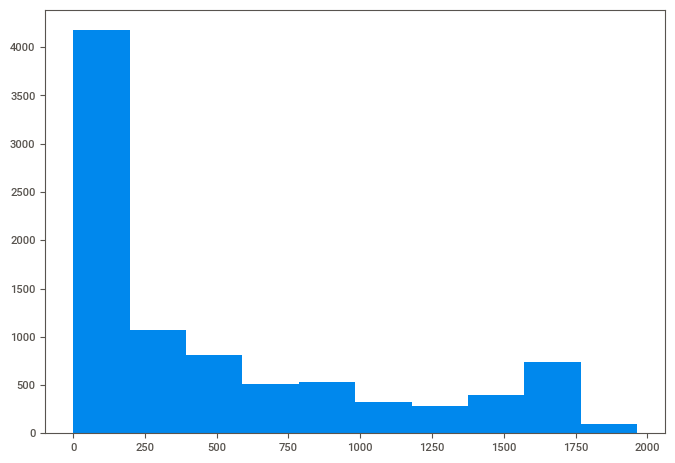

In [32]:
plt.hist(resultDF["num_neighbors"])
plt.show()

In [33]:
resultDF["cluster-data"]= resultDF["cluster-data"].fillna(-1)

717
8228
5


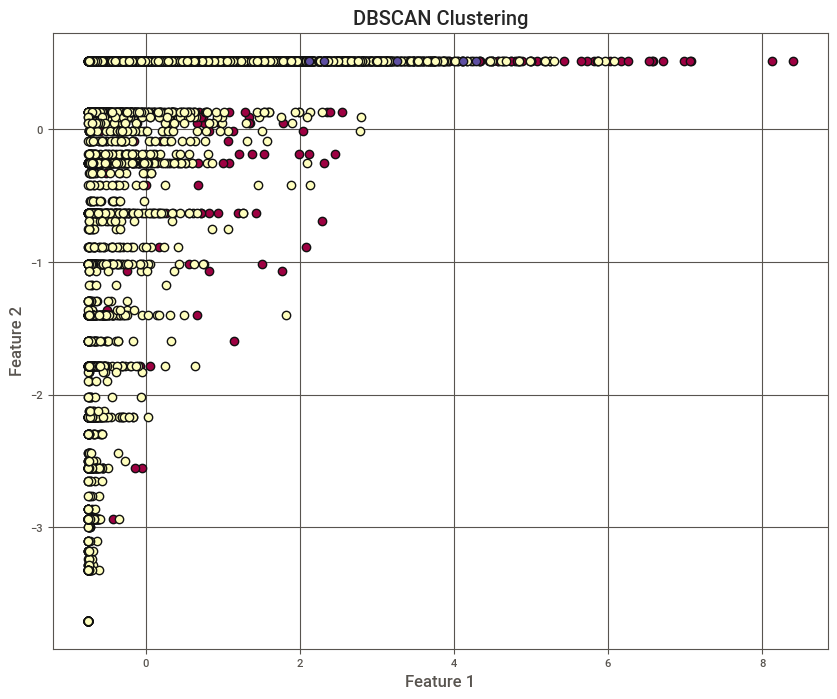

In [34]:
plt.figure(figsize=(10, 8))
unique_labels = np.unique(resultDF["cluster-data"])
labels = resultDF["cluster-data"].to_list()

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    # if k == -1:
    #     col = [0.6, 0.6, 0.6, 1]
    class_member_mask = (labels == k)
    print(sum(class_member_mask))
    xy = df_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend( loc ="lower right")
plt.grid(True)
plt.show()

# 8. OPTICS

OPTICS (Ordering Points To Identify the Clustering Structure) OPTICS (Ordering Points To Identify the Clustering Structure) is a density-based clustering algorithm and can be considered as a generalization of DBSCAN. However, it is known for its ability to identify structures of different densities in the dataset, instead of using a single eps value.

Working Principle: - The reachability distance is calculated for each data point. This determines how close a point is to another point at a certain density. - Based on these distances, a reachability graph is created. - Valleys in the graph indicate density-based clusters.

Advantages: - It can detect clusters of varying densities. - You do not have to select a fixed value for the eps parameter. - It can automatically distinguish noise.

Challenges: - The computational cost can be high, especially for large datasets. - Interpretation of the results might be slightly more challenging compared to DBSCAN.

OPTICS is quite useful for datasets with regions of varying density. It is successful in detecting transitions between clusters of different densities.

In [37]:
class OPTICS:
    def __init__(self, min_samples, max_eps=np.inf):
        self.min_samples = min_samples
        self.max_eps = max_eps
        self.cluster_hierarchy = []

    def fit_predict(self, X):
        self.X = X  # Store the dataset in the instance
        self.tree = BallTree(X)
        self.order = []
        self.reachability_distances = np.full(X.shape[0], np.inf)
        self.processed = np.zeros(X.shape[0], dtype=bool)

        for i in range(X.shape[0]):
            if not self.processed[i]:
                self._expand_cluster_order(i)

    def _expand_cluster_order(self, point_idx):
      neighbors_idx = self._query_region(point_idx)
      self.processed[point_idx] = True
      self.order.append(point_idx)
      if len(neighbors_idx) >= self.min_samples:
          self.reachability_distances[point_idx] = 0
          while len(neighbors_idx) > 0:
              next_point_idx = neighbors_idx.pop()
              if not self.processed[next_point_idx]:
                  self.processed[next_point_idx] = True
                  self.order.append(next_point_idx)
                  new_neighbors_idx = self._query_region(next_point_idx)
                  if len(new_neighbors_idx) >= self.min_samples:
                      neighbors_idx.extend(new_neighbors_idx)
                      # Calculate the distance from point_idx to next_point_idx
                      distance = np.linalg.norm(self.X[point_idx] - self.X[next_point_idx])
                      # Update reachability distance
                      self.reachability_distances[next_point_idx] = min(distance, self.reachability_distances[next_point_idx])

    def _query_region(self, point_idx):
        indices = self.tree.query_radius([self.X[point_idx]], self.max_eps)[0]
        return [idx for idx in indices if idx != point_idx and not self.processed[idx]]

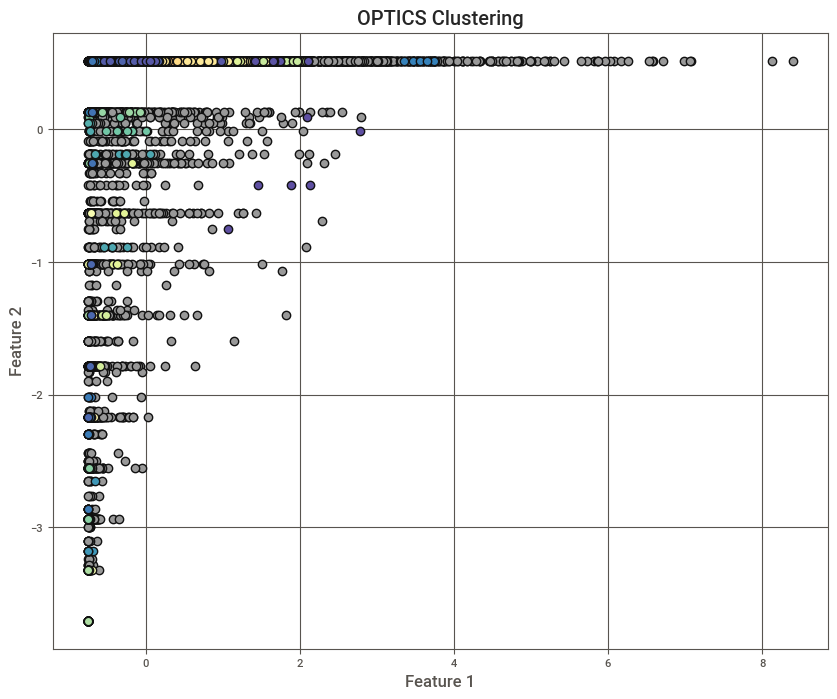

In [36]:
# Initialize and fit the OPTICS model
optics = OPTICS(min_samples=5, max_eps=2.2)
optics.fit_predict(df_scaled)

# Extract labels from the reachability distances
labels = np.where(optics.reachability_distances > 2.2, -1, 0)  # -1 for noise, 0 for in-cluster


# Plotting
plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0.6, 0.6, 0.6, 1]
    class_member_mask = (labels == k)
    xy = df_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

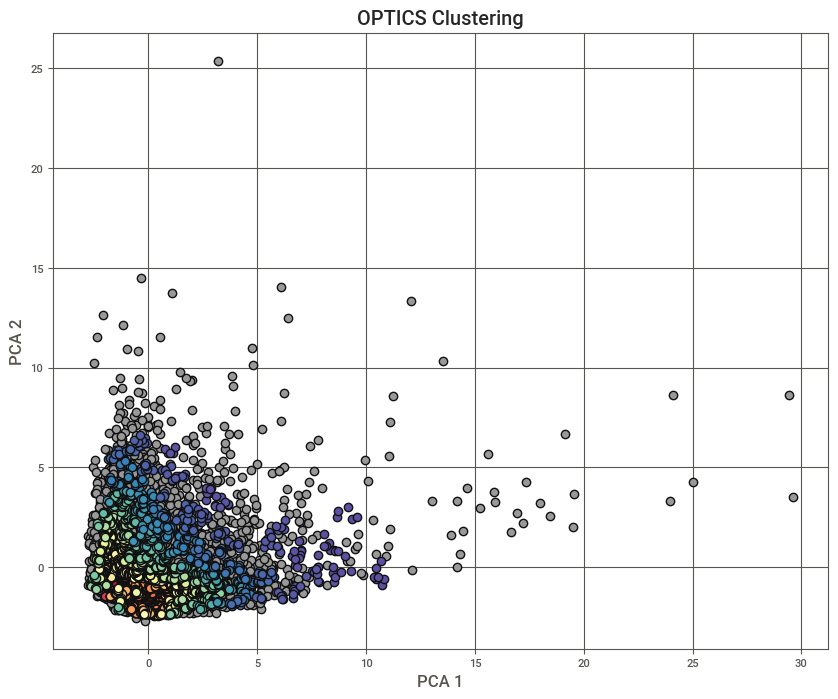

In [40]:
# PCA Transformation
pca = PCA(n_components=2)  # for example, reduce to 2 dimensions
df_pca = pca.fit_transform(df_scaled)

# Initialize and fit the OPTICS model on PCA-transformed data
optics = OPTICS(min_samples=5, max_eps=2.2)
optics.fit_predict(df_pca)

# Extract labels from the reachability distances
labels = np.where(optics.reachability_distances > 2.2, -1, 0)  # -1 for noise, 0 for in-cluster

# Plotting
plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0.6, 0.6, 0.6, 1]

    class_member_mask = (labels == k)
    xy = df_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('OPTICS Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()